In [1]:
### Case study on Palmer Penguins Dataset 

In [2]:
### Objective - To perform data preprocessing, visualization, regression and classification on Palmer Penguins datset

In [3]:
### Penguins Data Column Definition

### species: a factor denoting penguin species (Adélie, Chinstrap and Gentoo)

### island: a factor denoting island in Palmer Archipelago, Antarctica (Biscoe, Dream or Torgersen)

### bill_length_mm: a number denoting bill length (millimeters)

### bill_depth_mm: a number denoting bill depth (millimeters)

### flipper_length_mm: an integer denoting flipper length (millimeters)

### body_mass_g: an integer denoting body mass (grams)

### sex: a factor denoting penguin sex (female, male)

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
penguins = pd.read_csv('https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv')
penguins.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [6]:
####Let us drop rowid and year from penguins dataset

In [7]:
penguins.drop('rowid',axis=1,inplace= True)
penguins.drop('year',axis=1,inplace= True)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [8]:
penguins.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [9]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [10]:
penguins.shape

(344, 7)

In [11]:
### Let us check for null values, if any

In [12]:
print(pd.isnull(penguins).sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [13]:
### It was found that all features in the dataset except species and island have null values. So let us replace the null values with mean and with mode for sex

In [14]:
penguins['bill_length_mm'].fillna(penguins['bill_length_mm'].mean(), inplace = True)
penguins['bill_depth_mm'].fillna(penguins['bill_depth_mm'].mean(), inplace = True)
penguins['flipper_length_mm'].fillna(penguins['flipper_length_mm'].mean(), inplace = True)
penguins['body_mass_g'].fillna(penguins['body_mass_g'].mean(), inplace = True)
penguins['sex'].fillna(penguins['sex'].mode()[0], inplace = True)

In [15]:
### Let us check again if the null values has been removed

In [16]:
print(pd.isnull(penguins).sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [17]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,female


In [18]:
### Visualization of dataset

In [19]:
### Firstly, let us count the species which is most popular. It is found that most of the penguins in the dataset belongs to Adelie species

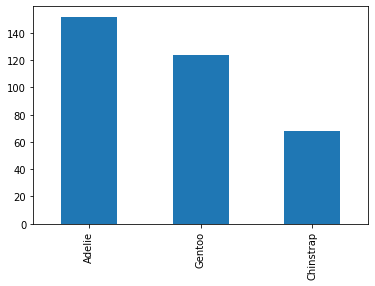

In [20]:
penguins['species'].value_counts().plot(kind='bar')

In [21]:
### Let us now check how the flipper length varies among different penguin species.
### It is found that penguins in Gentoo species tend to have larger flipper length compared to penguins in other species

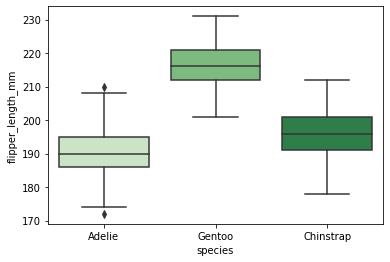

In [22]:
ax = sns.boxplot(y="flipper_length_mm",x="species", data=penguins, dodge=False, palette="Greens")

In [23]:
### Let us now check how the flipper length varies among different islands.
### It is found that penguins in Biscoe island tend to have larger flipper length compared to penguins in other islands

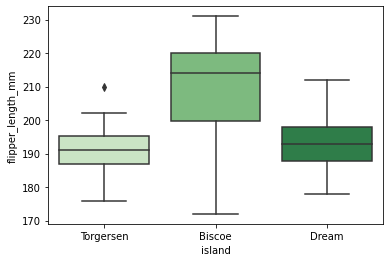

In [24]:
ax = sns.boxplot(y="flipper_length_mm",x="island", data=penguins, dodge=False, palette="Greens")

In [25]:
### Let us now check how the bill length varies among different species.
### It is found that penguins in Biscoe island tend to have lower bill length compared to penguins in other species

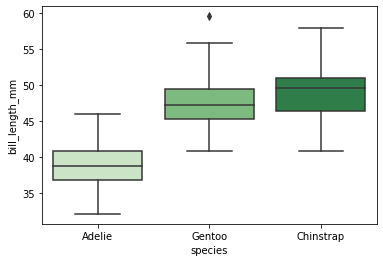

In [26]:
ax = sns.boxplot(y="bill_length_mm",x="species", data=penguins, dodge=False, palette="Greens")

In [27]:
### Let us now check how the bill length varies among different islands.
### It is found that penguins in Torgersen island tend to have lower bill length compared to penguins in other islands

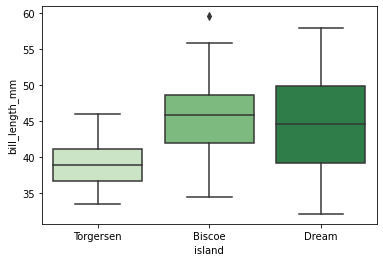

In [28]:
ax = sns.boxplot(y="bill_length_mm",x="island", data=penguins, dodge=False, palette="Greens")

In [29]:
### Let us now check how the bill depth varies among different species.
### It is found that penguins in Gentoo species tend to have lower bill depth compared to penguins in other species

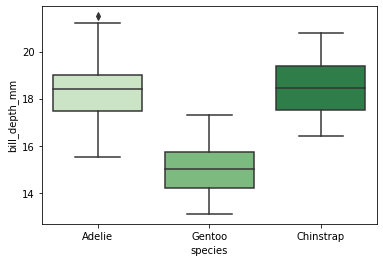

In [30]:
ax = sns.boxplot(y="bill_depth_mm",x="species", data=penguins, dodge=False, palette="Greens")

In [31]:
### Let us now check how the bill depth varies among different islands.
### It is found that penguins in Biscoe island tend to have lower bill depth compared to penguins in other islands

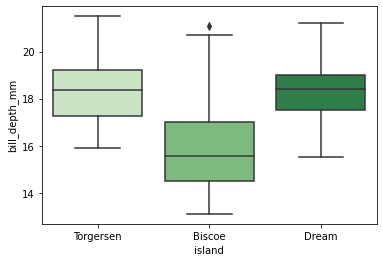

In [32]:
ax = sns.boxplot(y="bill_depth_mm",x="island", data=penguins, dodge=False, palette="Greens")

In [33]:
### Let us now check how the body mass varies among different species.
### It is found that penguins in Gentoo species tend to have higher body  mass compared to penguins in other species

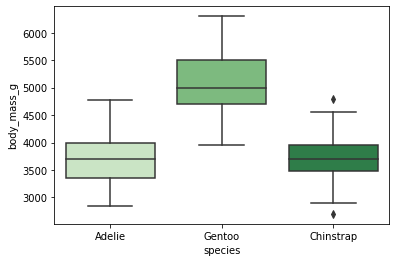

In [34]:
ax = sns.boxplot(y="body_mass_g",x="species", data=penguins, dodge=False, palette="Greens")

In [35]:
### Let us now check how the body mass varies among different islands.
### It is found that penguins in Biscoe island tend to have higher body  mass compared to penguins in other island

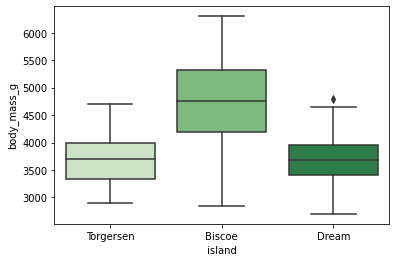

In [36]:
ax = sns.boxplot(y="body_mass_g",x="island", data=penguins, dodge=False, palette="Greens")

In [37]:
### Let us now check how the bill length varies among male and female penguins.
### It is found that male penguins tend to have slightly higher bill length compared to female penguins 

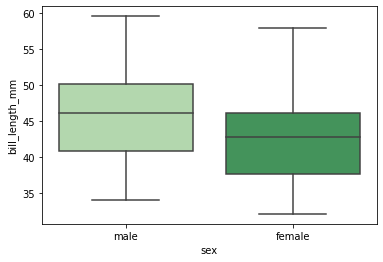

In [38]:
ax = sns.boxplot(y="bill_length_mm",x="sex", data=penguins, dodge=False, palette="Greens")

In [39]:
### Let us now check how the bill depth varies among male and female penguins.
### It is found that male penguins tend to have higher bill depth compared to female penguins 

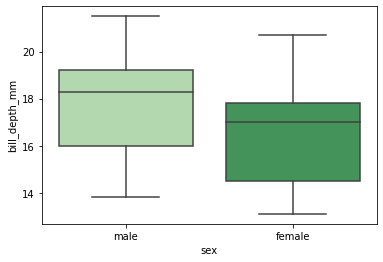

In [40]:
ax = sns.boxplot(y="bill_depth_mm",x="sex", data=penguins, dodge=False, palette="Greens")

In [41]:
### Let us now check how the flipper length varies among male and female penguins.
### It is found that male penguins tend to have slightly higher flipper length compared to female penguins 

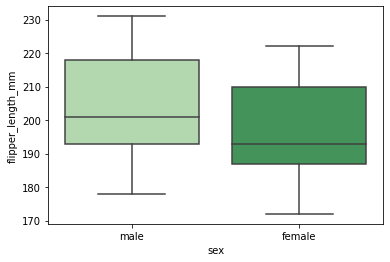

In [42]:
ax = sns.boxplot(y="flipper_length_mm",x="sex", data=penguins, dodge=False, palette="Greens")

In [43]:
### Let us now check how the body mass varies among male and female penguins.
### It is found that male penguins tend to have slightly higher body mass compared to female penguins 

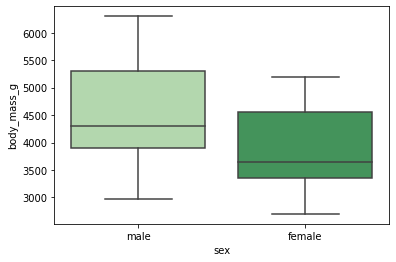

In [44]:
ax = sns.boxplot(y="body_mass_g",x="sex", data=penguins, dodge=False, palette="Greens")

In [45]:
### The scatter plot which shows us the correlation with respect to other features. 
### This method helps just to figure out the important features 
### It can be found from the figure that flipper length and body mass has a very strong positive correlation than other features

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


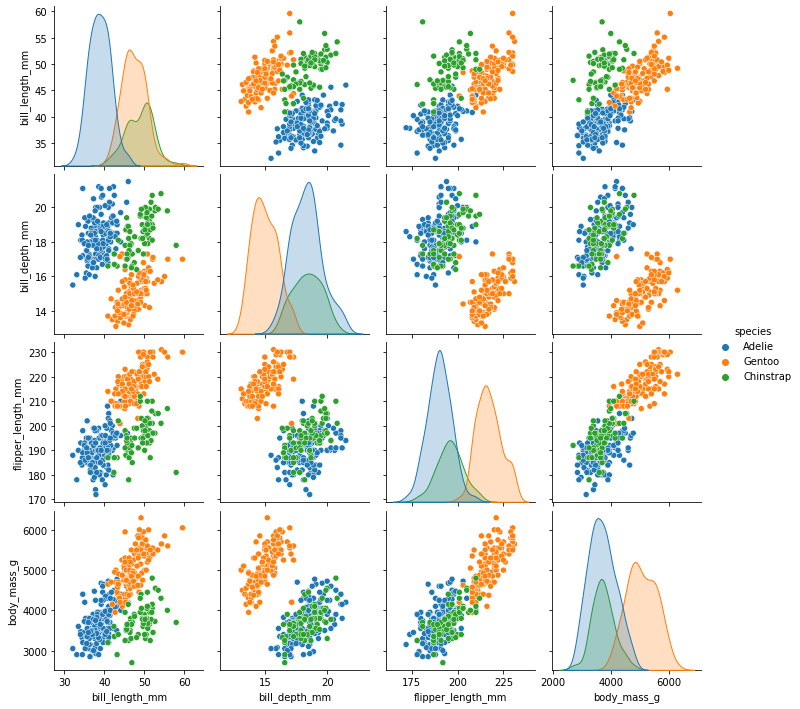

In [46]:
sns.pairplot(penguins, hue='species', size=2.5);

In [47]:
### From the box plot visualizations done previously, it is found that the dataset has outliers. 
### Let us set the upper and lower limits for detecting outliers based on percentiles and interquartile ranges

In [48]:
upper_lim1 = np.percentile(penguins['bill_length_mm'],75,interpolation = 'midpoint')
lower_lim1 = np.percentile(penguins['bill_length_mm'],25,interpolation = 'midpoint')
IQR1 = upper_lim1 - lower_lim1
upper1 = (upper_lim1+1.5*IQR1)
lower1 = (lower_lim1-1.5*IQR1)

upper_lim2 = np.percentile(penguins['bill_depth_mm'],75,interpolation = 'midpoint')
lower_lim2 = np.percentile(penguins['bill_depth_mm'],25,interpolation = 'midpoint')
IQR2 = upper_lim2 - lower_lim2
upper2 = (upper_lim2+1.5*IQR2)
lower2 = (lower_lim2-1.5*IQR2)

upper_lim3 = np.percentile(penguins['flipper_length_mm'],75,interpolation = 'midpoint')
lower_lim3 = np.percentile(penguins['flipper_length_mm'],25,interpolation = 'midpoint')
IQR3 = upper_lim3 - lower_lim3
upper3 = (upper_lim3+1.5*IQR3)
lower3 = (lower_lim3-1.5*IQR3)

upper_lim4 = np.percentile(penguins['body_mass_g'],75,interpolation = 'midpoint')
lower_lim4 = np.percentile(penguins['body_mass_g'],25,interpolation = 'midpoint')
IQR4 = upper_lim4 - lower_lim4
upper4 = (upper_lim4+1.5*IQR4)
lower4 = (lower_lim4-1.5*IQR4)

penguins_no_outliers = penguins[(penguins['bill_length_mm'] < upper1) & (penguins['bill_length_mm'] > lower1)]
penguins_no_outliers = penguins_no_outliers[(penguins_no_outliers['bill_depth_mm'] < upper2) & (penguins_no_outliers['bill_depth_mm'] > lower2)]
penguins_no_outliers = penguins_no_outliers[(penguins_no_outliers['flipper_length_mm'] < upper3) & (penguins_no_outliers['flipper_length_mm'] > lower3)]
penguins1 = penguins_no_outliers[(penguins_no_outliers['body_mass_g'] < upper4) & (penguins_no_outliers['body_mass_g'] > lower4)]

In [49]:
penguins1.shape

(344, 7)

In [50]:
### It has been found that there are no outliers when we use IQR method of outlier detection.
### However it is obvious that some of the plots showed outliers, for e.g. box plot between bill length and species showed outliers in Gentoo species
### This is because the box plot shows the outliers only for Gentoo species range of bill length values
### When we take the overall range of bill length values, it is within 1.5*IQR above minimum and maximum values

In [51]:
### In the penguins dataset, sex, species and island are categorical variables. Let us therefore map these to integer values

In [52]:
penguins_mapping1 = {"female": 0, "male": 1}
penguins_mapping2 = {"Adelie" : 0, "Chinstrap" : 1, "Gentoo": 2}
penguins_mapping3 = {"Biscoe":0, "Dream":1, "Torgersen":2}
penguins1['sex'] = penguins1['sex'].map(penguins_mapping1)
penguins1['species'] = penguins1['species'].map(penguins_mapping2)
penguins1['island'] = penguins1['island'].map(penguins_mapping3)

In [53]:
### For the purpose of regression, let us consider bill length, bill depth, flipper length and body mass. Currently let us neglect categorical variables
### Let us find the correlation between continuous variables

In [54]:
penguins2 = penguins1.drop('sex',axis=1)
penguins2 = penguins2.drop('species',axis=1)
penguins2 = penguins2.drop('island',axis=1)

In [55]:
### The correlation matrix. 
### It can be found from the correlation matrix that flipper length and body mass has the highest correlation of approx. 0.9

In [56]:
penguins_corr = penguins2.corr()
penguins_corr

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [57]:
### Visualization of the correlations using heat map

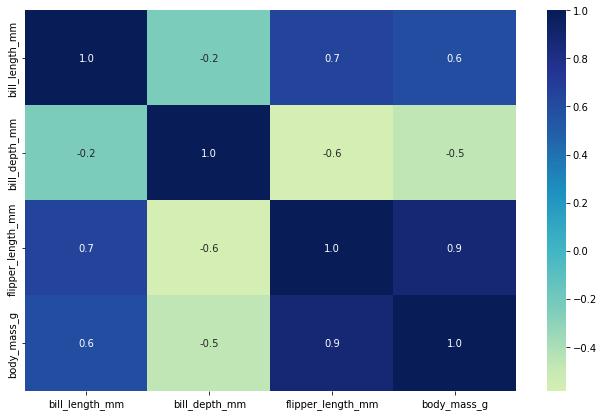

In [58]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(penguins_corr, annot=True, fmt='.1f', cmap='YlGnBu', center=0, ax=ax)

In [59]:
### Reshaping the variables to 1-D array
### For the purpose of regression, we shall take bill length, bill depth, flipper length as independent variables
### The dependent variable is body mass
### Our aim is to predict the body mass based on on bill length, flipper length, bill depth

In [60]:
x1 = penguins1['bill_length_mm'].values.reshape(-1,1)
x2 = penguins1['bill_depth_mm'].values.reshape(-1,1)
x3 = penguins1['flipper_length_mm'].values.reshape(-1,1)
y = penguins1['body_mass_g'].values.reshape(-1,1)

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
### Let us first do a simple linear regression on body mass taking bill length as independent variable

In [63]:
reg = LinearRegression()
reg.fit(x1, y)
print("The linear model is: Y = {:.7} + {:.5} Bill length".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = 362.3067 + 87.415 Bill length


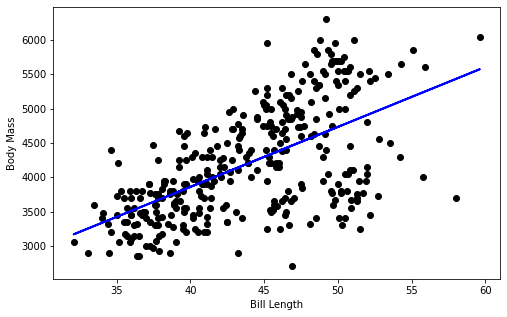

In [64]:
bill_length_predictions = reg.predict(x1)
plt.figure(figsize=(8,5))
plt.scatter(
    penguins1['bill_length_mm'],
    penguins1['body_mass_g'],
    c='black'
)
plt.plot(
    penguins1['bill_length_mm'],
    bill_length_predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Bill Length")
plt.ylabel("Body Mass")
plt.show()


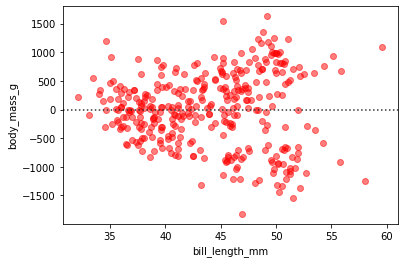

In [65]:
sns.residplot(x='bill_length_mm', y='body_mass_g', order=2,
   data=penguins1, scatter_kws={'color': 'r',
   'alpha': 0.5})

In [66]:
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [67]:
### The following regression results show that only 35% of variability in body mass is explained by the above model

In [68]:
x1_bill_length = penguins1['bill_length_mm']
y = penguins1['body_mass_g']
x2_bill_length = sm.add_constant(x1_bill_length)
est = sm.OLS(y, x2_bill_length)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     187.5
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           2.45e-34
Time:                        06:27:12   Log-Likelihood:                -2711.8
No. Observations:                 344   AIC:                             5428.
Df Residuals:                     342   BIC:                             5435.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            362.3067    282.503      1.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [69]:
### Let us next do a simple linear regression on body mass taking bill depth as independent variable

In [70]:
x2 = penguins1['bill_depth_mm'].values.reshape(-1,1)
y = penguins1['body_mass_g'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(x2, y)
print("The linear model is: Y = {:.7} + {:.5} Bill depth".format(reg.intercept_[0], reg.coef_[0][0]))


The linear model is: Y = 7488.652 + -191.64 Bill depth


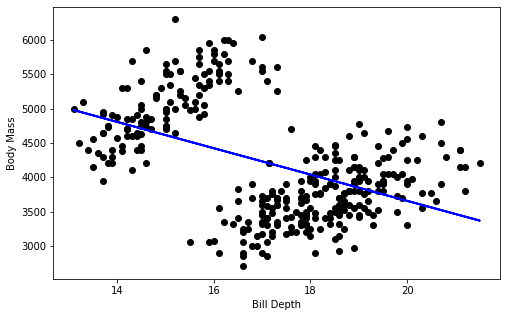

In [71]:
bill_depth_predictions = reg.predict(x2)
plt.figure(figsize=(8,5))
plt.scatter(
    penguins1['bill_depth_mm'],
    penguins1['body_mass_g'],
    c='black'
)
plt.plot(
    penguins1['bill_depth_mm'],
    bill_depth_predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Bill Depth")
plt.ylabel("Body Mass")
plt.show()



In [72]:
### The following regression results show that only 22% of variability in body mass is explained by the above model

In [73]:
x1_bill_depth = penguins1['bill_depth_mm']
y = penguins1['body_mass_g']
x2_bill_depth = sm.add_constant(x1_bill_depth)
est = sm.OLS(y, x2_bill_depth)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     97.99
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           1.76e-20
Time:                        06:27:13   Log-Likelihood:                -2743.6
No. Observations:                 344   AIC:                             5491.
Df Residuals:                     342   BIC:                             5499.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7488.6524    334.224     22.406

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


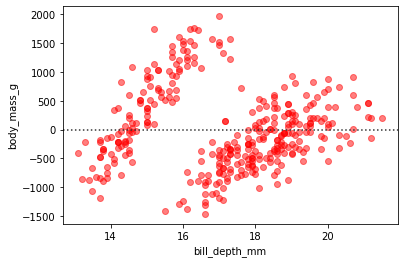

In [74]:
sns.residplot(x='bill_depth_mm', y='body_mass_g', order=2,
   data=penguins1, scatter_kws={'color': 'r',
   'alpha': 0.5})


In [75]:
### Let us next do a simple linear regression on body mass taking flipper length as independent variable

In [76]:
x3 = penguins1['flipper_length_mm'].values.reshape(-1,1)
y = penguins1['body_mass_g'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(x3, y)
print("The linear model is: Y = {:.7} + {:.5} Flipper length".format(reg.intercept_[0], reg.coef_[0][0]))


The linear model is: Y = -5780.831 + 49.686 Flipper length


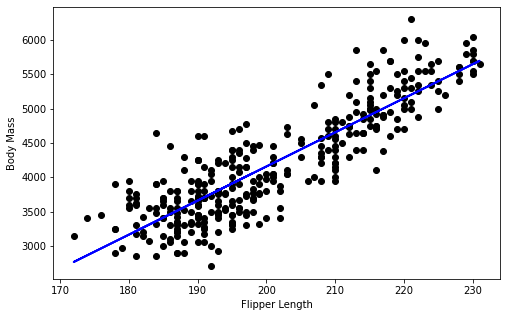

In [77]:
flipper_length_predictions = reg.predict(x3)
plt.figure(figsize=(8,5))
plt.scatter(
    penguins1['flipper_length_mm'],
    penguins1['body_mass_g'],
    c='black'
)
plt.plot(
    penguins1['flipper_length_mm'],
    flipper_length_predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Flipper Length")
plt.ylabel("Body Mass")
plt.show()


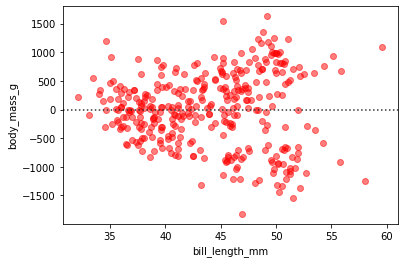

In [78]:
sns.residplot(x='bill_length_mm', y='body_mass_g', order=2,
   data=penguins1, scatter_kws={'color': 'r',
   'alpha': 0.5})


In [79]:
### The following regression results show that 75 % of variability in body mass is explained by the above model

In [80]:
x1_flipper_length = penguins1['flipper_length_mm']
y = penguins1['body_mass_g']
x2_flipper_length = sm.add_constant(x1_flipper_length)
est = sm.OLS(y, x2_flipper_length)
est2 = est.fit()
print(est2.summary())



                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1077.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          1.05e-107
Time:                        06:27:15   Log-Likelihood:                -2542.2
No. Observations:                 344   AIC:                             5088.
Df Residuals:                     342   BIC:                             5096.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5780.8314    304.91

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [81]:
### Let us now conider multiple regression considering the effect of bill length, bill depth, flipper length on body mass

In [82]:
feature_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
x = penguins1[feature_cols]
y = penguins1.body_mass_g

In [83]:
reg = LinearRegression()
reg.fit(x, y)

LinearRegression()

In [84]:
print("The linear model is: Y = {:.7} + {:.5} bill length + {:.5} bill depth + {:.5} flipper length".format(reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2] ))

The linear model is: Y = -6424.765 + 4.1618 bill length + 20.05 bill depth + 50.269 flipper length


In [85]:
### The following regression results show that 76% of variability in body mass is explained by multiple regression on body mass
### We already know that 73% of variability in body mass is explained by simple linear regression taking flipper length
### The inference is that flipper length contributes most to regression on body mass.
### There is no need to consider the effect of bill length and bill depth on predicting the body mass

In [86]:
x = sm.add_constant(x) 
mul_reg = sm.OLS(y, x).fit()
print(mul_reg.summary())


                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     361.8
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          1.96e-105
Time:                        06:27:15   Log-Likelihood:                -2540.4
No. Observations:                 344   AIC:                             5089.
Df Residuals:                     340   BIC:                             5104.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -6424.7647    559.81

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [87]:
### Let us now consider the classification problem. One way to deal with the classification problem is to predict the sex of penguin
### considering species, island, bill length, bill depth, flipper length
### We find that a more fruitful classification problem is predicting the class of the penguins based on other features
### We therefore take target or class as species
### Features or predictors as sex, island, flipper length, bill length, bill depth, body mass

In [88]:
from sklearn.model_selection import train_test_split
predictors = penguins1.drop(['species'], axis=1)
target = penguins1["species"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [89]:
### We need to sclae or normalize the values before applying the classification problem

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

In [91]:
### Let us first take Gaussian Naive bayes Classifier

In [92]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
modelNB = GaussianNB()
modelNB.fit(x_train, y_train)
y_predNB = modelNB.predict(x_val)

In [93]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize

In [94]:
### Since this is a multiclass problem, we need to binarize the target variable before plotting ROC curves

In [95]:
y_predNB_bin = label_binarize(y_predNB, classes=[0, 1, 2])
y_val_bin = label_binarize(y_val, classes=[0, 1, 2])

In [96]:
### One ROC curve can be drawn per class.
### Or we can calculate metrics globally by considering each element of the label indicator matrix as a label. This is called micro averaging

In [97]:
from itertools import cycle


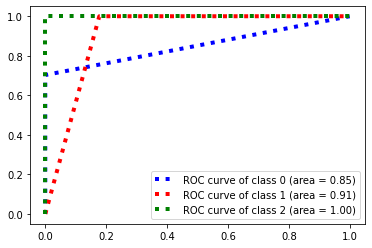

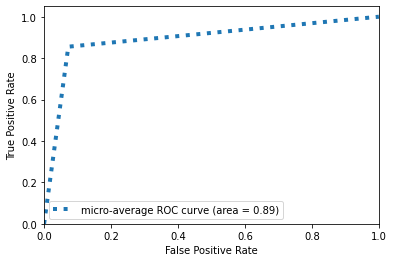

In [98]:
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_predNB_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, 
             label='ROC curve of class {0} (area = {1:0.2f})'
             .format(i, roc_auc[i]),linestyle=":",
               linewidth=4,)
    plt.legend()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val_bin.ravel(), y_predNB_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    #color="deeppink",
    linestyle=":",
    linewidth=4,
)
plt.legend()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
NB = roc_auc["micro"]


In [99]:
### Classification results of NB Classifier

In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_val,y_predNB))

              precision    recall  f1-score   support

           0       1.00      0.70      0.83        37
           1       0.56      1.00      0.72        14
           2       1.00      1.00      1.00        25

    accuracy                           0.86        76
   macro avg       0.85      0.90      0.85        76
weighted avg       0.92      0.86      0.86        76



In [101]:
### Preparing the confusion matrix

In [102]:
from sklearn import metrics
cnf_matrixNB = metrics.confusion_matrix(y_val, y_predNB)
cnf_matrixNB

array([[26, 11,  0],
       [ 0, 14,  0],
       [ 0,  0, 25]])

In [103]:
### Visualization of confusion matrix using heat map. 11 samples truly belonging to class 0 has been misclassified as class 1

Text(0.5, 257.44, 'Predicted label')

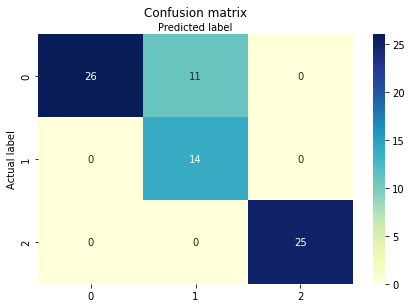

In [104]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrixNB), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [105]:
### CLassification using Decision Tree Classifier

In [106]:
from sklearn import tree
from sklearn.metrics import accuracy_score
modelDT = tree.DecisionTreeClassifier(criterion='entropy')
modelDT.fit(x_train, y_train)
y_predDT = modelDT.predict(x_val)

In [107]:
### Plotting ROC curve

In [108]:
y_predDT_bin = label_binarize(y_predDT, classes=[0, 1, 2])
y_val_bin = label_binarize(y_val, classes=[0, 1, 2])

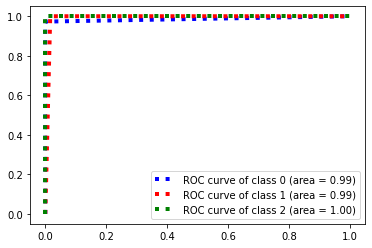

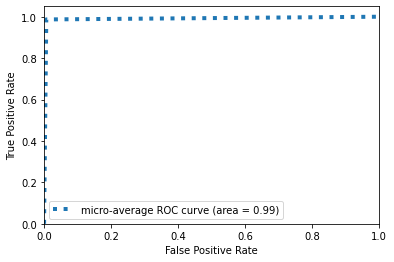

In [109]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_predDT_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, 
             label='ROC curve of class {0} (area = {1:0.2f})'
             .format(i, roc_auc[i]),linestyle=":",
               linewidth=4,)
    plt.legend()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val_bin.ravel(), y_predDT_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    #color="deeppink",
    linestyle=":",
    linewidth=4,
)
plt.legend()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
DT = roc_auc["micro"]

In [110]:
### Classification report

In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_val,y_predDT))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        25

    accuracy                           0.99        76
   macro avg       0.98      0.99      0.98        76
weighted avg       0.99      0.99      0.99        76



In [112]:
### Printing confusion matrix

In [113]:
from sklearn import metrics
cnf_matrixDT = metrics.confusion_matrix(y_val, y_predDT)
cnf_matrixDT

array([[36,  1,  0],
       [ 0, 14,  0],
       [ 0,  0, 25]])

In [114]:
### Visualizing confusion matrix using heat map. Only 1 sample truly belonging to class 0 has been misclassified as class 1.

Text(0.5, 257.44, 'Predicted label')

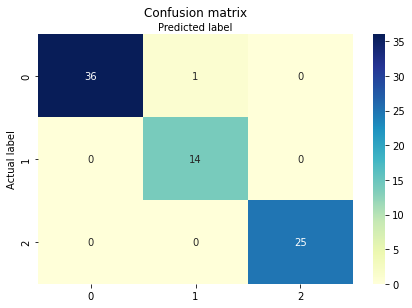

In [115]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrixDT), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [116]:
### CLassification using Logistic Regression

In [117]:
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression(multi_class='ovr')
modelLR.fit(x_train, y_train)
y_predLR = modelLR.predict(x_val)

In [118]:
### Plotting ROC

In [119]:
y_predLR_bin = label_binarize(y_predLR, classes=[0, 1, 2])
y_val_bin = label_binarize(y_val, classes=[0, 1, 2])

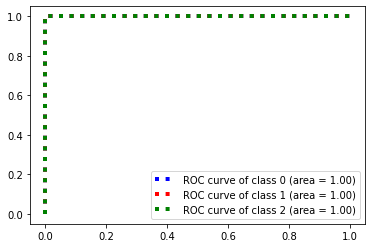

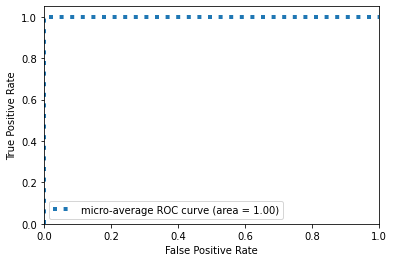

In [120]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_predLR_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, 
             label='ROC curve of class {0} (area = {1:0.2f})'
             .format(i, roc_auc[i]),linestyle=":",
               linewidth=4,)
    plt.legend()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val_bin.ravel(), y_predLR_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    #color="deeppink",
    linestyle=":",
    linewidth=4,
)
plt.legend()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
LR = roc_auc["micro"]

In [121]:
### Classification report

In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_val,y_predLR))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        25

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



In [123]:
### Preparing confusion matrix

In [124]:
from sklearn import metrics
cnf_matrixLR = metrics.confusion_matrix(y_val, y_predLR)
cnf_matrixLR

array([[37,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 25]])

In [125]:
### Visualization of confusion matrix using heat map. All the samples have been correctly classified

Text(0.5, 257.44, 'Predicted label')

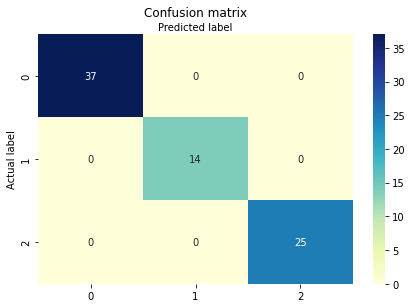

In [126]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrixLR), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [127]:
### Classification using KNN

In [128]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

Minimum error:- 0.013157894736842105 at K = 2


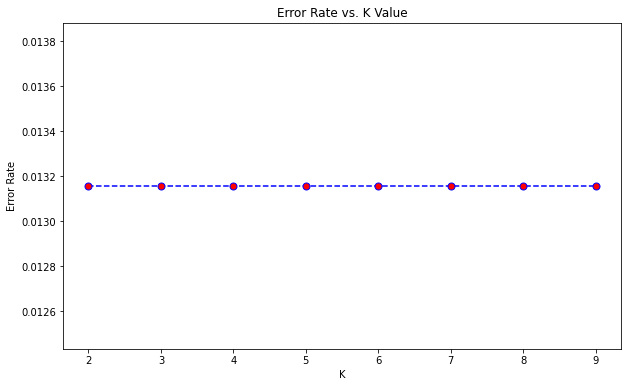

In [129]:
error_rate = []
for i in range(2,10):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_val)
 error_rate.append(np.mean(pred_i != y_val))
plt.figure(figsize=(10,6))
plt.plot(range(2,10),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=7)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",2 + error_rate.index(min(error_rate)))

In [130]:
### The above plot shows that irrespective of the number of neighbors, KNN classifier has error of 0 or accuracy of 1

In [131]:

modelKNN = KNeighborsClassifier(n_neighbors=5)
modelKNN.fit(x_train, y_train)
y_predKNN = modelKNN.predict(x_val)


In [132]:
### Plotting the ROC

In [133]:
y_predKNN_bin = label_binarize(y_predKNN, classes=[0, 1, 2])
y_val_bin = label_binarize(y_val, classes=[0, 1, 2])

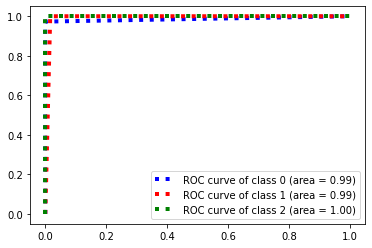

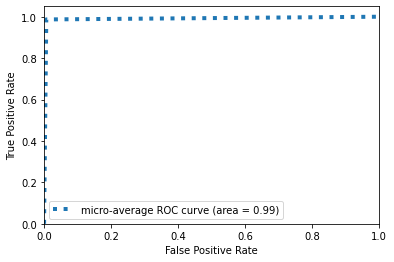

In [134]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_predKNN_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, 
             label='ROC curve of class {0} (area = {1:0.2f})'
             .format(i, roc_auc[i]),linestyle=":",
               linewidth=4,)
    plt.legend()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val_bin.ravel(), y_predKNN_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    #color="deeppink",
    linestyle=":",
    linewidth=4,
)
plt.legend()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
KNN = roc_auc["micro"]

In [135]:
### Confusion matrix
### One sample belonging to class 0 has been misclassified as class 1

In [136]:
from sklearn import metrics
cnf_matrixKNN = metrics.confusion_matrix(y_val, y_predKNN)
cnf_matrixKNN

array([[36,  1,  0],
       [ 0, 14,  0],
       [ 0,  0, 25]])

In [137]:
### Classification report

In [138]:
print(classification_report(y_val, y_predKNN))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        25

    accuracy                           0.99        76
   macro avg       0.98      0.99      0.98        76
weighted avg       0.99      0.99      0.99        76



In [139]:
### Visualization of confusion matrix using heat map. One sample belonging to class 0 has been misclassified as class 1

Text(0.5, 257.44, 'Predicted label')

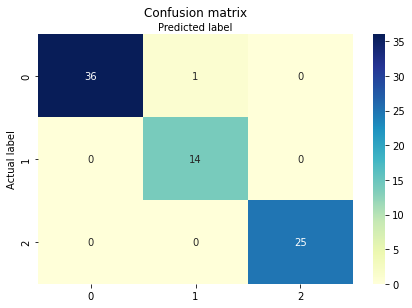

In [140]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrixKNN), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [141]:
### Classification using SVM

In [142]:
from sklearn import svm
modelSVM = svm.SVC(kernel='linear') 
modelSVM.fit(x_train, y_train)
y_predSVM = modelSVM.predict(x_val)

In [143]:
### Plotting ROC

In [144]:
y_predSVM_bin = label_binarize(y_predSVM, classes=[0, 1, 2])
y_val_bin = label_binarize(y_val, classes=[0, 1, 2])

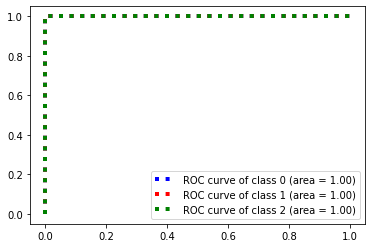

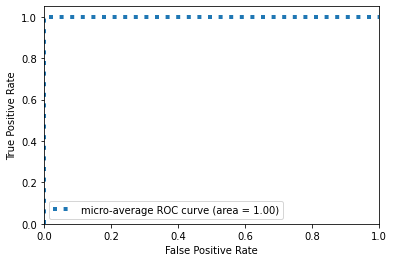

In [145]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_predSVM_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, 
             label='ROC curve of class {0} (area = {1:0.2f})'
             .format(i, roc_auc[i]),linestyle=":",
               linewidth=4,)
    plt.legend()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val_bin.ravel(), y_predSVM_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    #color="deeppink",
    linestyle=":",
    linewidth=4,
)
plt.legend()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
SVM = roc_auc["micro"]

In [146]:
### COnfusion matrix

In [147]:
from sklearn import metrics
cnf_matrixSVM = metrics.confusion_matrix(y_val, y_predSVM)
cnf_matrixSVM

array([[37,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 25]])

In [148]:
### Classification report

In [149]:
from sklearn.metrics import classification_report
print(classification_report(y_val,y_predSVM))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        25

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



In [150]:
## Visualization of confusion matrix using heat map. All samples have been correctly classified

Text(0.5, 257.44, 'Predicted label')

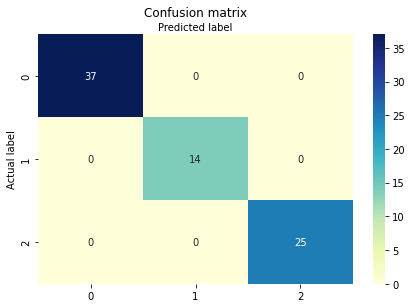

In [151]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrixSVM), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [152]:
### CLassification using LDA

In [153]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
modelLDA = LinearDiscriminantAnalysis()
modelLDA.fit(x_train, y_train)
y_predLDA = modelLDA.predict(x_val)

In [154]:
### Plotting ROC

In [155]:
y_predLDA_bin = label_binarize(y_predLDA, classes=[0, 1, 2])
y_val_bin = label_binarize(y_val, classes=[0, 1, 2])

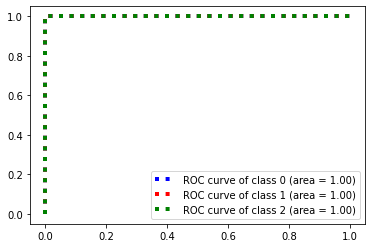

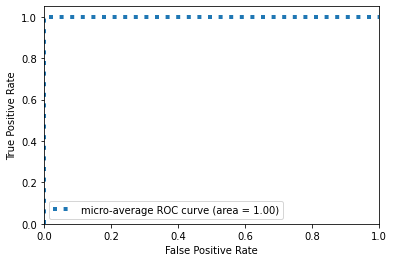

In [156]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_predLDA_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, 
             label='ROC curve of class {0} (area = {1:0.2f})'
             .format(i, roc_auc[i]),linestyle=":",
               linewidth=4,)
    plt.legend()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val_bin.ravel(), y_predLDA_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    #color="deeppink",
    linestyle=":",
    linewidth=4,
)
plt.legend()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
LDA = roc_auc["micro"]

In [157]:
### COnfusion matrix

In [158]:
from sklearn import metrics
cnf_matrixLDA = metrics.confusion_matrix(y_val, y_predLDA)
cnf_matrixLDA

array([[37,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 25]])

In [159]:
### Classification report

In [160]:
from sklearn.metrics import classification_report
print(classification_report(y_val,y_predLDA))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        25

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



In [161]:
## Visualization of confusion matrix using heat map. All samples have been correctly classified

Text(0.5, 257.44, 'Predicted label')

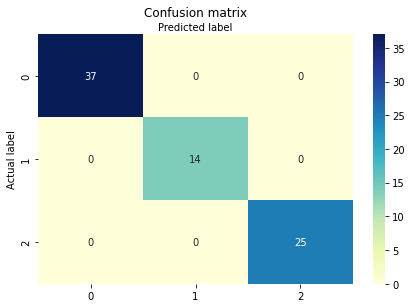

In [162]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrixLDA), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0, 0.5, 'AUC')

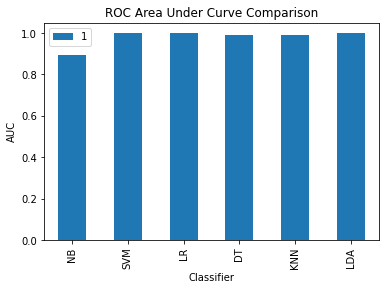

In [163]:
data = [['NB', NB],['SVM',SVM],['LR',LR], ['DT',DT],['KNN',KNN],['LDA',LDA]]
comparison = pd.DataFrame(data,index=['NB','SVM','LR','DT','KNN','LDA'])
comparison.plot.bar()
plt.title("ROC Area Under Curve Comparison")
plt.xlabel("Classifier")
plt.ylabel("AUC")



In [164]:
comparison

,0,1
NB,NB,0.891447
SVM,SVM,1.000000
LR,LR,1.000000
DT,DT,0.990132
KNN,KNN,0.990132
LDA,LDA,1.000000


In [165]:
### The comparison of ROC Area under curve shows that almost all the classifiers work well with Penguins dataset.
### SVM, LR, LDA has AUC of 1, while NB has the smallest AUC of 0.89 among all the classifiers used

Case Study 2

In [166]:
### Classification using Deep Learning

In [167]:
from tensorflow import keras

In [168]:
from tensorflow.keras.models import Sequential

In [169]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [170]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [171]:
model = Sequential()

In [172]:
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D

In [173]:
from tensorflow.keras import optimizers

In [174]:
from sklearn.datasets import make_classification

In [175]:
### Let us demonstrate MLP neural network as a classifier to predict the species of penguins data set
### The main issue with MLP model is deciding the number of hidden layers as well as number of neurons in each layer
### Let us perform parameter tuning using Grid Search

In [176]:
### Function to find number of nodes in each layer

In [177]:
def FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes):
    layers = []
    nodes_increment = (last_layer_nodes - first_layer_nodes)/ (n_layers-1)
    nodes = first_layer_nodes
    for i in range(1, n_layers+1):
        layers.append(math.ceil(nodes))
        nodes = nodes + nodes_increment
    return layers

In [178]:
### Defining the parameters to be tuned

In [192]:
activation_funcs = [ 'tanh'] 
loss_funcs = ['sparse_categorical_crossentropy','mse']
param_grid = dict(n_layers=np.array([2]), first_layer_nodes = np.array([64,32,16]), last_layer_nodes = np.array([4]),   activation_func = activation_funcs, loss_func = loss_funcs, batch_size = np.array([100]), epochs = np.array([40,60]))
grid = GridSearchCV(estimator = model,scoring = 'accuracy', param_grid = param_grid)

In [180]:
### Creating the MLP Model

In [193]:
def createmodel(n_layers, first_layer_nodes, last_layer_nodes, activation_func, loss_func):
    model = Sequential()
    n_nodes = FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes)
    for i in range(1, n_layers):
        if i==1:
            model.add(Dense(first_layer_nodes, input_dim=x_train.shape[1], activation=activation_func))
        else:
            model.add(Dense(n_nodes[i-1], activation=activation_func))
    #Finally, the output layer should have three node since it is multi-class classification
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss=loss_func,  metrics = ["accuracy"]) #note: metrics could also be 'mse'
    return model
model =  KerasClassifier(build_fn=createmodel,verbose = False) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  del sys.path[0]


In [194]:
import math

In [195]:
grid.fit(x_train,y_train)

2/2 [==============================] - 0s 8ms/step


2/2 [==============================] - 0s 10ms/step


2/2 [==============================] - 0s 5ms/step


GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f5bfeb37f90>,
             param_grid={'activation_func': ['tanh'],
                         'batch_size': array([100]), 'epochs': array([40, 60]),
                         'first_layer_nodes': array([64, 32, 16]),
                         'last_layer_nodes': array([4]),
                         'loss_func': ['sparse_categorical_crossentropy',
                                       'mse'],
                         'n_layers': array([2])},
             scoring='accuracy')

In [196]:
print(grid.best_score_)
print(grid.best_params_)

0.9813417190775681
{'activation_func': 'tanh', 'batch_size': 100, 'epochs': 40, 'first_layer_nodes': 64, 'last_layer_nodes': 4, 'loss_func': 'sparse_categorical_crossentropy', 'n_layers': 2}


In [198]:
### From grid search it was found that the most suitable activation function is tanh, batch size is 100, epochs is 40, first layer nodes is 64 and hidden layer node is 4, loss function is sparse categorical crossentropy
### Let us use them for building our simple MLP model

In [199]:
### The Adam optimization algorithm is an extension to stochastic gradient descent
### Softmax function returns the probability of each class
### Binary Cross-Entropy: Cross-entropy as a loss function for a binary classification task.
### Categorical Cross-Entropy: Cross-entropy as a loss function for a multi-class classification task.
### In multiclass classification problems, categorical crossentropy loss is the loss function of choice. However, it requires that your labels are one-hot encoded, which is not always the case.
### n that case, sparse categorical crossentropy loss can be a good choice. This loss function performs the same type of loss – categorical crossentropy loss – but works on integer targets instead of one-hot encoded ones.
### These are tasks where an example can only belong to one out of many possible categories, and the model must decide which one.

In [200]:
model = Sequential()
model.add(Dense(64, input_shape = (x_train.shape[1],), activation = 'tanh'))
model.add(Dense(4, activation = 'tanh'))
model.add(Dense(3, activation = 'softmax'))
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])  
finalmodel = KerasClassifier(build_fn=lambda:model,verbose = False) 
history = finalmodel.fit(x_train, y_train, batch_size = 100, epochs = 60, verbose = 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


In [201]:
### Plotting training accuracy

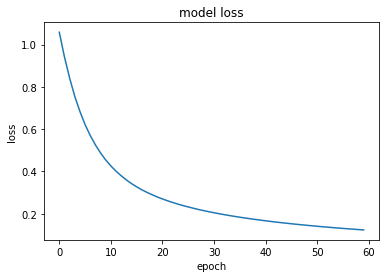

In [202]:
# summarize history for loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [203]:
y_pred = model.predict(x_val)

3/3 [==============================] - 0s 5ms/step


In [204]:
y_predMLP = y_pred.argmax(axis=1)

In [205]:
from sklearn import metrics
cnf_matrixMLP = metrics.confusion_matrix(y_val, y_predMLP)
cnf_matrixMLP

array([[36,  1,  0],
       [ 0, 14,  0],
       [ 0,  0, 25]])

In [206]:
### We have evaluated the testing accuracy using confusion matrix
### It was found that in most of the runs none of the species are misclassified

In [207]:
from sklearn.metrics import classification_report
print(classification_report(y_val,y_predMLP))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        25

    accuracy                           0.99        76
   macro avg       0.98      0.99      0.98        76
weighted avg       0.99      0.99      0.99        76



In [208]:
### From the classification report it is clear that the model has good cccuracy

In [209]:
### Convolutional Neural Networks

In [210]:
### The filters parameters is just how many different windows you will have. (All of them with the same length, which is kernel_size). 
### When you use filters = 64 and kernel_size=2, you are creating 64 different filters, each of them with length 2. The result will bring 64 different convolutions.

In [211]:
### The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero

In [212]:
### Pooling layers are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network.
### The pooling layer summarises the features present in a region of the feature map generated by a convolution layer.
### So, further operations are performed on summarised features instead of precisely positioned features generated by the convolution layer.
### This makes the model more robust to variations in the position of the features in the input image. 

In [213]:
### Flattening is converting the data into a 1-dimensional array for inputting it to the next layer.
### We flatten the output of the convolutional layers to create a single long feature vector. 
### It is connected to the final classification model, which is called a fully-connected layer

In [214]:
model = Sequential()
model.add(Conv1D(64, 2, activation="relu", input_shape=(x_train.shape[1],1)))
model.add(Dense(16, activation="relu"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', 
     optimizer = "adam",               
              metrics = ['accuracy'])
model.summary()

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 64)             192       
                                                                 
 dense_125 (Dense)           (None, 5, 16)             1040      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 16)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense_126 (Dense)           (None, 3)                 99        
                                                                 
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
___________________________________________________

In [215]:
### (64*2)+64=192
### (16*64)+16 = 1040
### (32*3)+3 = 99

In [216]:
model.fit(x_train, y_train, batch_size=16,epochs=100, verbose=0)
acc = model.evaluate(x_val, y_val)
print("Loss:", acc[0], " Accuracy:", acc[1])

3/3 [==============================] - 0s 6ms/step - loss: 0.0046 - accuracy: 1.0000
Loss: 0.004644851200282574  Accuracy: 1.0


In [217]:
pred = model.predict(x_val)
pred_y = pred.argmax(axis=-1)

3/3 [==============================] - 0s 4ms/step


In [218]:
cm = confusion_matrix(y_val, pred_y)
print(cm)

[[37  0  0]
 [ 0 14  0]
 [ 0  0 25]]


In [219]:
### CNN is able to classify all species correctly which is evident from the confusion matrix

In [220]:
### Recurrent Neural Networks

In [221]:
### Recurrent Neural Network(RNN) are a type of Neural Network where the output from previous step are fed as input to the current step.
### In traditional neural networks, all the inputs and outputs are independent of each other
### But in cases like when it is required to predict the next word of a sentence, the previous words are required and hence there is a need to remember the previous words. 
### Thus RNN came into existence, which solved this issue with the help of a Hidden Layer. 
### The main and most important feature of RNN is Hidden state, which remembers some information about a sequence.

In [222]:
from tensorflow.keras.layers import SimpleRNN

In [223]:
def vanilla_rnn():
    model = Sequential()
    model.add(SimpleRNN(50, input_shape = (x_train.shape[1],1), return_sequences = False))
    model.add(Dense(5,activation='relu'))
    model.add(Dense(3,activation='softmax'))
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

In [224]:
model = KerasClassifier(build_fn = vanilla_rnn, epochs = 200, batch_size = 50, verbose = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [225]:
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/200
6/6 [==============================] - 1s 5ms/step - loss: 0.8622 - accuracy: 0.6940
Epoch 2/200
6/6 [==============================] - 0s 4ms/step - loss: 0.6582 - accuracy: 0.8993
Epoch 3/200
6/6 [==============================] - 0s 5ms/step - loss: 0.5130 - accuracy: 0.9254
Epoch 4/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4132 - accuracy: 0.9254
Epoch 5/200
6/6 [==============================] - 0s 4ms/step - loss: 0.3427 - accuracy: 0.9328
Epoch 6/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2878 - accuracy: 0.9478
Epoch 7/200
6/6 [==============================] - 0s 4ms/step - loss: 0.2422 - accuracy: 0.9590
Epoch 8/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2060 - accuracy: 0.9627
Epoch 9/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1746 - accuracy: 0.9776
Epoch 10/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1499 - accuracy: 0.9813
Epoch 11/200
6/6 [===========

In [226]:
### Confusion matrix shows that RNN model has also been able to classify all the species correctly

In [227]:
y_pred = model.predict(x_val)

3/3 [==============================] - 0s 4ms/step


In [228]:
cm = confusion_matrix(y_val,y_pred)
print(cm)

[[37  0  0]
 [ 0 14  0]
 [ 0  0 25]]


In [229]:
from sklearn.metrics import classification_report
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        25

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



Clustering

In [230]:
### Clustering

In [231]:
### Hopkins Statistic
### The Hopkins statistic (Lawson and Jurs 1990) is used to assess the clustering tendency of a data set by measuring the probability
### that a given data set is generated by uniform data distribution. 
### In other words, it tests the spatial randomness of the data.
### A value close to 1 tends to indicate the data is highly clustered, 
### random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0

In [232]:
!pip install pyclustertend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [233]:
### pyclustertend is a python package available on Pypi specialized in cluster tendency which consist to assess if clustering algorithms are relevant for a dataset.

In [234]:
from pyclustertend import hopkins

In [235]:
### Let us consider clustering based on two features bill length and bill depth

In [236]:
data1 = penguins1[['bill_length_mm','bill_depth_mm','species']]
data1

,bill_length_mm,bill_depth_mm,species
0,39.10000,18.70000,0
1,39.50000,17.40000,0
2,40.30000,18.00000,0
3,43.92193,17.15117,0
4,36.70000,19.30000,0
...,...,...,...
339,55.80000,19.80000,1
340,43.50000,18.10000,1
341,49.60000,18.20000,1
342,50.80000,19.00000,1


In [237]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data1)
data_new1 = scaler.transform(data1)

In [238]:
### Let us check if the data set considering bill length and bill depth is clusterable based on hopkins statistic
### Here actually 1-hopkins statistic should be considered
### Hopkins statistic of above 0.5 indicated that the data is quite clusterable

In [239]:
1-hopkins(data_new1[:,0:2],5)

0.6518367871686088

In [240]:
### Let us now perform K-Means clustering on data with featuresbill length and bill depth

In [241]:
### K-means Clustering

In [242]:
### Centroid is calculated using mean
### A medoid is a most centrally located object in the Cluster or whose average dissimilarity to all the objects is minimum.
### The k-medoids method is more robust than k-means in the presence of noise and outliers because a medoid is less influenced by outliers or other extreme values than a mean.

In [243]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [244]:
### We first use the elbow method to find the optimal number of clusters.
### The below graph shows that 3 clusters is optimal

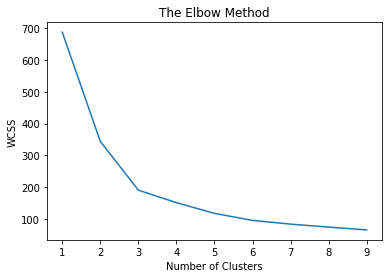

In [245]:
wcss=[]
for i in range(1, 10):
    kmeans1 = KMeans(n_clusters = i, random_state = 14)
    kmeans1.fit(data_new1[:,0:2])
    wcss.append(kmeans1.inertia_)
plt.plot(range(1, 10), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [246]:
### Inertia measures how well a dataset was clustered by K-Means.
### It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.
### A good model is one with low inertia AND a low number of clusters (K). However, this is a tradeoff because as K increases, inertia decreases.

In [247]:
### The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. 
### The Silhouette Coefficient for a sample is (b - a) / max(a, b).
### To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. 
### Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.
### 1: Means clusters are well apart from each other and clearly distinguished.
### 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
### -1: Means clusters are assigned in the wrong way.

In [248]:
### Now let us find the optimal number of clusters using Silhoutte coefficient
### Silhoutte cefficient peaks at 3 clusters, so it is optimal

In [249]:
range_n_clusters = [2, 3, 4, 5]

In [250]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_new1[:,0:2])
    silhouette_avg = silhouette_score(data_new1[:,0:2], cluster_labels)
    print(
        "For number of clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For number of clusters = 2 The average silhouette_score is : 0.4722792985469836
For number of clusters = 3 The average silhouette_score is : 0.521003575410269
For number of clusters = 4 The average silhouette_score is : 0.43476447812333846
For number of clusters = 5 The average silhouette_score is : 0.39632061837630184


In [251]:
### Now that we have found the optimal number of clusters, let us do K-means clustering with k=3 on bill length and bill depth features

In [252]:
kmeans1 = KMeans(n_clusters=3).fit(data_new1[:,0:2])
centroids1 = kmeans1.cluster_centers_
print(centroids1)

[[ 0.59290527 -1.09857081]
 [ 1.10667296  0.80204702]
 [-0.93509825  0.5547764 ]]


Text(0.5, 1.0, 'K-Means Clustered Plot')

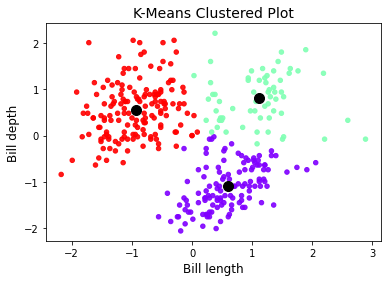

In [253]:
plt.scatter(data_new1[:,0], data_new1[:,1], c= kmeans1.labels_.astype(float), s=20, alpha=0.9,cmap='rainbow')
plt.scatter(centroids1[:, 0], centroids1[:, 1], c='black', s=100)
plt.xlabel("Bill length", size=12)
plt.ylabel("Bill depth", size=12)
plt.title("K-Means Clustered Plot", size=14)

In [254]:
### Comparing clustered plot and original plot shows that k-means clustering taking bill length and bill depth is able to almost cluster the species well

Text(0, 0.5, 'Bill depth')

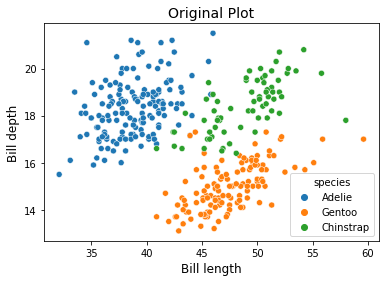

In [255]:
sns.scatterplot(data=penguins, x=penguins['bill_length_mm'], y=penguins['bill_depth_mm'], hue="species")
plt.title("Original Plot", size=14)
plt.xlabel("Bill length", size=12)
plt.ylabel("Bill depth", size=12)

In [256]:
clusterer1 = KMeans(n_clusters=3, random_state=10)
cluster_labels1 = clusterer1.fit_predict(data_new1[:,0:2])
silhouette_avg1 = silhouette_score(data_new1[:,0:2], cluster_labels1)
silhouette_avg1

0.521003575410269

In [257]:
### The Silhoutte coefficient is 0.52, clusters are separated but not perfectly separated

In [258]:
### Now let us consider the features bill length and flipper length

In [259]:
data2 = penguins1[['bill_length_mm','flipper_length_mm','species']]
scaler = StandardScaler()
scaler.fit(data2)
data_new2 = scaler.transform(data2)


In [260]:
### Hopkins statistic reveals that the data based on bill length and flipper length is clusterable

In [261]:
1-hopkins(data_new2[:,0:2],5)

0.8211700103532624

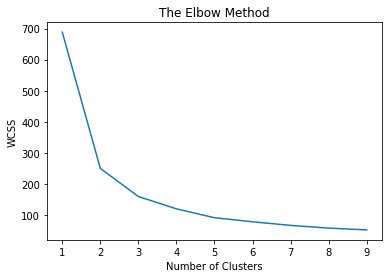

In [262]:
wcss=[]
for i in range(1, 10):
    kmeans2 = KMeans(n_clusters = i, random_state = 14)
    kmeans2.fit(data_new2[:,0:2])
    wcss.append(kmeans2.inertia_)
plt.plot(range(1, 10), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [263]:
### Elbow method shows 2 or 3 as optimal clusters

In [264]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels2 = clusterer.fit_predict(data_new2[:,0:2])
    silhouette_avg = silhouette_score(data_new2[:,0:2], cluster_labels2)
    print(
        "For number of clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )


For number of clusters = 2 The average silhouette_score is : 0.5384000102953969
For number of clusters = 3 The average silhouette_score is : 0.5153530006948376
For number of clusters = 4 The average silhouette_score is : 0.5025809373673168
For number of clusters = 5 The average silhouette_score is : 0.4358533858771418


In [265]:
### Silhoutte coefficient peaks at 2 clusters, so let us cluster the data into 2 clusters

In [266]:
kmeans2 = KMeans(n_clusters=2).fit(data_new2[:,0:2])
centroids2 = kmeans2.cluster_centers_
print(centroids2)

[[-0.79092739 -0.78463842]
 [ 0.80953744  0.8031005 ]]


Text(0.5, 1.0, 'K-Means Clustered Plot')

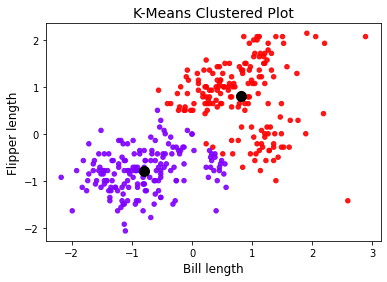

In [267]:
plt.scatter(data_new1[:,0], data_new2[:,1], c= kmeans2.labels_.astype(float), s=20, alpha=0.9,cmap='rainbow')
plt.scatter(centroids2[:, 0], centroids2[:, 1], c='black', s=100)
plt.xlabel("Bill length", size=12)
plt.ylabel("Flipper length", size=12)
plt.title("K-Means Clustered Plot", size=14)

In [268]:
### Comparing clustered and original plots show that Adelie species is quite separated and forms cluster 1 
### Gentoo and Chinstrap clusters into the same group

Text(0, 0.5, 'Flipper length')

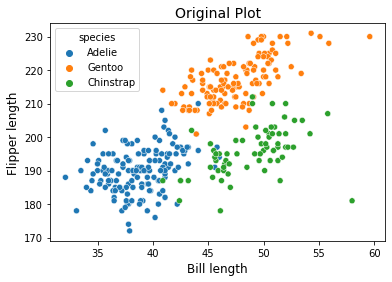

In [269]:
sns.scatterplot(data=penguins, x=penguins['bill_length_mm'], y=penguins['flipper_length_mm'], hue="species")
plt.title("Original Plot", size=14)
plt.xlabel("Bill length", size=12)
plt.ylabel("Flipper length", size=12)

In [270]:
clusterer2 = KMeans(n_clusters=2, random_state=10)
cluster_labels2 = clusterer2.fit_predict(data_new2[:,0:2])
silhouette_avg2 = silhouette_score(data_new2[:,0:2], cluster_labels2)
silhouette_avg2

0.5384000102953969

In [271]:
### K-means clustering taking bill length and body mass

In [272]:
data3 = penguins1[['bill_length_mm','body_mass_g','species']]
scaler = StandardScaler()
scaler.fit(data3)
data_new3 = scaler.transform(data3)

In [273]:
### Data based on bill length and body mass is clusterable according to hopkins statistic

In [274]:
1-hopkins(data_new3[:,0:2],5)

0.6373647322105906

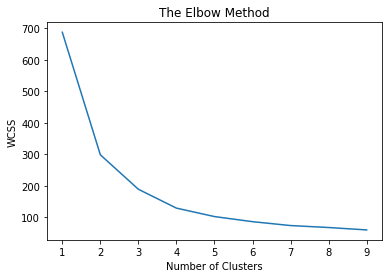

In [275]:
wcss=[]
for i in range(1, 10):
    kmeans3 = KMeans(n_clusters = i, random_state = 14)
    kmeans3.fit(data_new3[:,0:2])
    wcss.append(kmeans3.inertia_)
plt.plot(range(1, 10), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [276]:
### Elbow method again shows 2 or 3 as optimal clusters

In [277]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels3 = clusterer.fit_predict(data_new3[:,0:2])
    silhouette_avg = silhouette_score(data_new3[:,0:2], cluster_labels3)
    print(
        "For number of clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For number of clusters = 2 The average silhouette_score is : 0.4743907303549065
For number of clusters = 3 The average silhouette_score is : 0.46276361938265576
For number of clusters = 4 The average silhouette_score is : 0.47338854256055857
For number of clusters = 5 The average silhouette_score is : 0.417373291206321


In [278]:
### Considering Silhoutte coefficient and elbow method let us consider segregating the data into 2 clusters

In [279]:
kmeans3 = KMeans(n_clusters=2).fit(data_new3[:,0:2])
centroids3 = kmeans3.cluster_centers_
print(centroids3)

[[ 0.789718    0.69458029]
 [-0.8082996  -0.71092335]]


Text(0.5, 1.0, 'K-Means Clustered Plot')

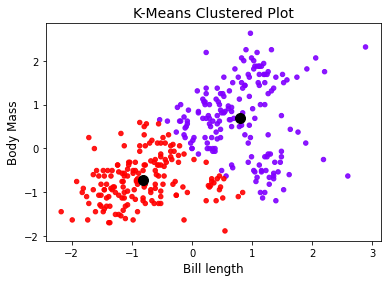

In [280]:
plt.scatter(data_new3[:,0], data_new3[:,1], c= kmeans3.labels_.astype(float), s=20, alpha=0.9,cmap='rainbow')
plt.scatter(centroids3[:, 0], centroids3[:, 1], c='black', s=100)
plt.xlabel("Bill length", size=12)
plt.ylabel("Body Mass", size=12)
plt.title("K-Means Clustered Plot", size=14)

In [281]:
### Gentoo and Chinstrap clusters together and Adelie separately

Text(0, 0.5, 'Body Mass')

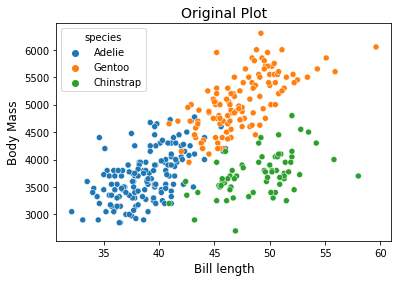

In [282]:
sns.scatterplot(data=penguins, x=penguins['bill_length_mm'], y=penguins['body_mass_g'], hue="species")
plt.title("Original Plot", size=14)
plt.xlabel("Bill length", size=12)
plt.ylabel("Body Mass", size=12)


In [283]:
clusterer3 = KMeans(n_clusters=2, random_state=10)
cluster_labels3 = clusterer3.fit_predict(data_new3[:,0:2])
silhouette_avg3 = silhouette_score(data_new3[:,0:2], cluster_labels3)
silhouette_avg3

0.4743907303549065

In [284]:
### Let us now considering clustering based on three features

In [285]:
data4 = penguins1[['bill_length_mm','bill_depth_mm','body_mass_g','species']]
scaler = StandardScaler()
scaler.fit(data4)
data_new4 = scaler.transform(data4)

In [286]:
### Data considering bill length, bill depth and body mass is clusterable according to Hopkins statistic

In [287]:
1-hopkins(data_new4[:,0:3],5)

0.8152459906646328

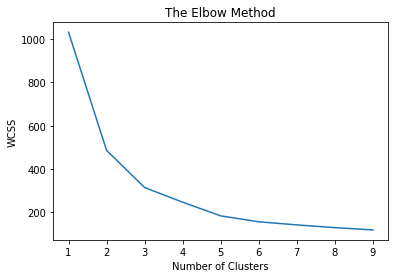

In [288]:
wcss=[]
for i in range(1, 10):
    kmeans4 = KMeans(n_clusters = i, random_state = 14)
    kmeans4.fit(data_new4[:,0:3])
    wcss.append(kmeans4.inertia_)
plt.plot(range(1, 10), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [289]:
### Both from elbow method and silhoutte coeffienct shows optimal of 2 clusters

In [290]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels4 = clusterer.fit_predict(data_new4[:,0:3])
    silhouette_avg = silhouette_score(data_new4[:,0:3], cluster_labels4)
    print(
        "For number of clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For number of clusters = 2 The average silhouette_score is : 0.4972083357577883
For number of clusters = 3 The average silhouette_score is : 0.47072305387314206
For number of clusters = 4 The average silhouette_score is : 0.439693602112376
For number of clusters = 5 The average silhouette_score is : 0.4048986251456844


In [291]:
kmeans4 = KMeans(n_clusters=2).fit(data_new4[:,0:3])
centroids4 =kmeans4.cluster_centers_
print(centroids4)

[[-0.38029608  0.61528467 -0.60931952]
 [ 0.67471885 -1.0916341   1.08105077]]


In [292]:
import plotly.express as px
fig = px.scatter_3d(data_new4, x=data_new4[:,0], y=data_new4[:,1], z=data_new4[:,2],
              color=kmeans4.labels_.astype(float))
fig.show()

In [293]:
import plotly.express as px
fig = px.scatter_3d(penguins, x=penguins['bill_length_mm'], y=penguins['bill_depth_mm'], z=penguins['body_mass_g'],
              color=penguins['species'])
fig.show()

In [294]:
### The inference is that considering three features instead of 2 is not bringing about much impact on how well the data is clustered. Silhoutte coefficient also has not improved

In [295]:
clusterer4 = KMeans(n_clusters=2, random_state=10)
cluster_labels4 = clusterer4.fit_predict(data_new4[:,0:3])
silhouette_avg4 = silhouette_score(data_new4[:,0:3], cluster_labels4)
silhouette_avg4

0.4972083357577883

In [296]:
### Let us try one more clustering considering three numerical features

In [297]:
data5 = penguins1[['bill_length_mm','flipper_length_mm','body_mass_g','species']]
scaler = StandardScaler()
scaler.fit(data5)
data_new5 = scaler.transform(data5)

In [298]:
1-hopkins(data_new5[:,0:4],5)

0.8189511313175385

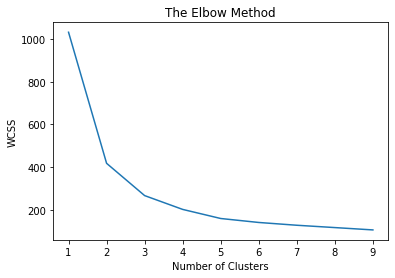

In [299]:
wcss=[]
for i in range(1, 10):
    kmeans5 = KMeans(n_clusters = i, random_state = 14)
    kmeans5.fit(data_new5[:,0:3])
    wcss.append(kmeans5.inertia_)
plt.plot(range(1, 10), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [300]:
### Both elbow and Silhoutte coefficient reveals that optimal number of clusters is 2

In [301]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels5 = clusterer.fit_predict(data_new5[:,0:3])
    silhouette_avg = silhouette_score(data_new5[:,0:3], cluster_labels5)
    print(
        "For number of clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For number of clusters = 2 The average silhouette_score is : 0.49820842900765067
For number of clusters = 3 The average silhouette_score is : 0.43271783567568495
For number of clusters = 4 The average silhouette_score is : 0.4457214859864717
For number of clusters = 5 The average silhouette_score is : 0.38330519635491067


In [302]:
kmeans5 = KMeans(n_clusters=2).fit(data_new5[:,0:3])
centroids5 = kmeans5.cluster_centers_
print(centroids5)

[[-0.53070525 -0.72129399 -0.66201315]
 [ 0.76406501  1.03845872  0.95311114]]


In [303]:
import plotly.express as px
fig = px.scatter_3d(data_new5, x=data_new5[:,0], y=data_new5[:,1], z=data_new5[:,2],
              color=kmeans5.labels_.astype(float))
fig.show()

In [304]:
import plotly.express as px
fig = px.scatter_3d(penguins, x=penguins['bill_length_mm'], y=penguins['flipper_length_mm'], z=penguins['body_mass_g'],
              color=penguins['species'])
fig.show()

In [305]:
### The inference is that considering three features instead of 2 is not bringing about much impact on how well the data is clustered

In [306]:
clusterer5 = KMeans(n_clusters=2, random_state=10)
cluster_labels5 = clusterer5.fit_predict(data_new5[:,0:3])
silhouette_avg5 = silhouette_score(data_new5[:,0:3], cluster_labels5)
silhouette_avg5

0.49820842900765067

In [307]:
### Let us try one more case considering 4 features

In [308]:
data6 = penguins1[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','species']]
scaler = StandardScaler()
scaler.fit(data6)
data_new6 = scaler.transform(data6)


In [309]:
### Data involving 'bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g' is clusterable as indicated by Hopkins statistic

In [310]:
1-hopkins(data_new1[:,0:4],5)

0.9126553246352568

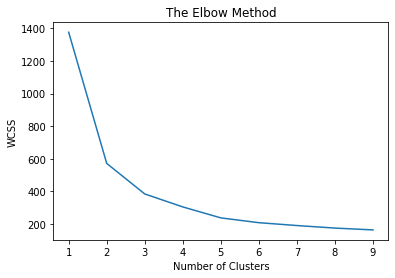

In [311]:
wcss=[]
for i in range(1, 10):
    kmeans6 = KMeans(n_clusters = i, random_state = 14)
    kmeans6.fit(data_new6[:,0:4])
    wcss.append(kmeans6.inertia_)
plt.plot(range(1, 10), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [312]:
### Optimal number of clusters according to elbow method and Silhoutte coefficient method is 2

In [313]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels6 = clusterer.fit_predict(data_new6[:,0:4])
    silhouette_avg = silhouette_score(data_new6[:,0:4], cluster_labels6)
    print(
        "For number of clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For number of clusters = 2 The average silhouette_score is : 0.529534374684656
For number of clusters = 3 The average silhouette_score is : 0.4438398792000198
For number of clusters = 4 The average silhouette_score is : 0.3974735945484643
For number of clusters = 5 The average silhouette_score is : 0.3749998013324226


In [314]:
clusterer6 = KMeans(n_clusters=2, random_state=10)
cluster_labels6 = clusterer6.fit_predict(data_new6[:,0:4])
silhouette_avg6 = silhouette_score(data_new6[:,0:3], cluster_labels6)
silhouette_avg6

0.5175489956209426

In [315]:
### Hierarchical Clustering

In [316]:
### Agglomerative: Agglomerative is a bottom-up approach, in which the algorithm starts with taking all data points as single clusters and merging them until one cluster is left.
### Divisive: Divisive algorithm is the reverse of the agglomerative algorithm as it is a top-down approach.
### i) Agglomerative Hierarchical clustering algorithm or AGNES (agglomerative nesting) and
### ii) Divisive Hierarchical clustering algorithm or DIANA (divisive analysis). Both this algorithm are exactly reverse of each other.

In [317]:
from sklearn.cluster import AgglomerativeClustering

In [318]:
import scipy.cluster.hierarchy as shc

In [319]:
###Let us again consider two features and see how it is clusterd by Agnes clustering

In [320]:
### A dendrogram is a diagram that shows the hierarchical relationship between objects.
### The key to interpreting a dendrogram is to focus on the height at which any two objects are joined together.
### Hierarchical clustering is usually used to better understand the structure and relationships in your data 
### Based on them you decide what number of clusters seems appropriate for your purpose
### A dendrogram can be interpreted by observing the height of any two objects that are joined together.
### If two objects appear to be most similar, the height of the links that connect them will be the smallest

In [321]:
### We will pass sch.linkage as an argument where linkage is an algorithm of hierarchical clustering. In linkage, we will specify the data i.e., X on which we are applying and the method that is used to find the cluster.
### Here we are using the ward method that tries to minimize the variance in each of the clusters. 

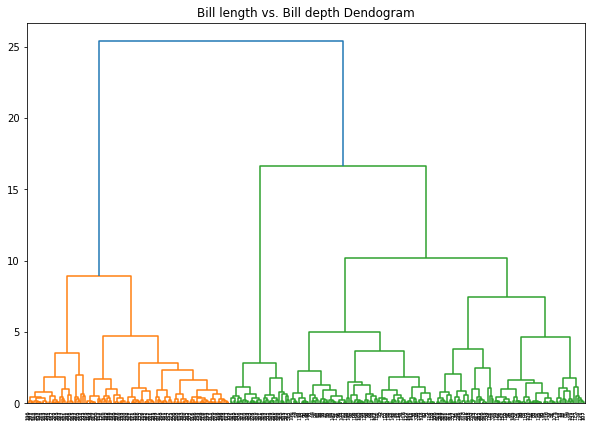

In [322]:
plt.figure(figsize=(10, 7))
plt.title("Bill length vs. Bill depth Dendogram")
dend1 = shc.dendrogram(shc.linkage(data_new1[:,0:2], method='ward'))

In [323]:
### Optimal number of clusters from dendrogram is 2

In [324]:
cluster1 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster1.fit_predict(data_new1[:,0:2])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,

Text(0, 0.5, 'Bill depth')

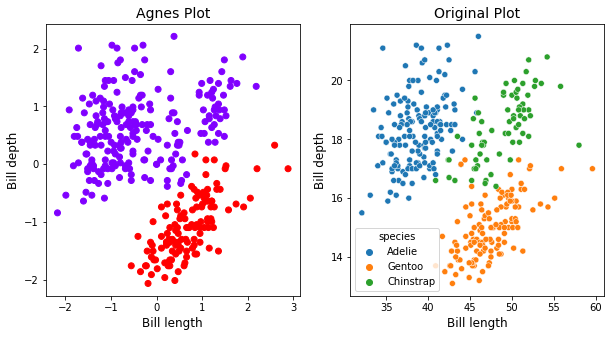

In [325]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data_new1[:,0], data_new1[:,1], c=cluster1.labels_, cmap='rainbow')
plt.title("Agnes Plot", size=14)
plt.xlabel("Bill length", size=12)
plt.ylabel("Bill depth", size=12)

plt.subplot(1, 2, 2)
sns.scatterplot(data=penguins, x=penguins['bill_length_mm'], y=penguins['bill_depth_mm'], hue="species")
plt.title("Original Plot", size=14)
plt.xlabel("Bill length", size=12)
plt.ylabel("Bill depth", size=12)

In [326]:
### Gentoo species is separated 

In [327]:
pred1 = cluster1.fit_predict(data_new1[:,0:2])
pred1=pd.DataFrame(pred1,columns={"cluster"})
pred1["species"]=penguins["species"]

In [328]:
pred1['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [329]:
plot1 = pred1.groupby(["species", "cluster"]).size().reset_index(name="counts")

In [330]:
pip install -U altair


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [331]:
### Altair is a Python library designed for statistical visualization.

In [332]:
import altair as alt

In [333]:
pred1['cluster'].value_counts()

0    219
1    125
Name: cluster, dtype: int64

In [334]:
### We can plot a group chart by calling the alt.Chart() method present inside Altair library.

In [335]:
alt.Chart(plot1).mark_bar(size=50).encode(
    x="cluster:O",
    y="counts:Q",
    color=alt.Color("species", title="Species"),
    tooltip=["cluster", "counts", "species"],
).properties(height=400,width=250)

alt.Chart(...)

In [336]:
### The above chart gives the correct number of species in each cluster. Cluster1 has all Adelie 152 numbers, 64 Chinstrap and 3 Gentoo
### Cluster 2 has121 Gentoo and 4 Chinstrap

In [337]:
### Let us again cluster based on bill length and flipper length

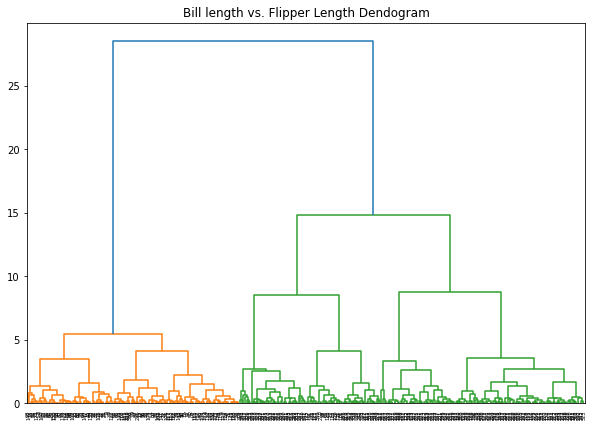

In [338]:
plt.figure(figsize=(10, 7))
plt.title("Bill length vs. Flipper Length Dendogram")
dend2 = shc.dendrogram(shc.linkage(data_new2[:,0:2], method='ward'))

In [339]:
### Dendrogram reveals optimal 2 clusters

In [340]:
cluster2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster2.fit_predict(data_new2[:,0:2])

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

Text(0, 0.5, 'Flipper length')

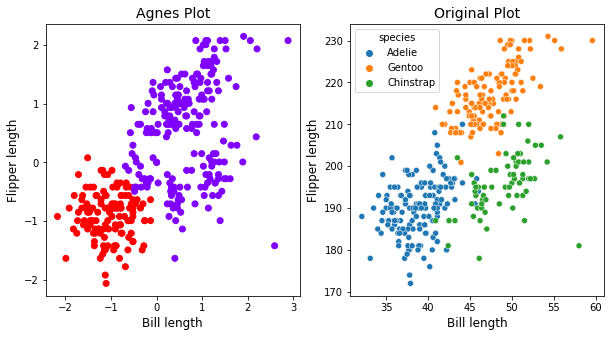

In [341]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data_new2[:,0], data_new2[:,1], c=cluster2.labels_, cmap='rainbow')
plt.title("Agnes Plot", size=14)
plt.xlabel("Bill length", size=12)
plt.ylabel("Flipper length", size=12)

plt.subplot(1, 2, 2)
sns.scatterplot(data=penguins, x=penguins['bill_length_mm'], y=penguins['flipper_length_mm'], hue="species")
plt.title("Original Plot", size=14)
plt.xlabel("Bill length", size=12)
plt.ylabel("Flipper length", size=12)


In [342]:
pred2 = cluster2.fit_predict(data_new2[:,0:2])
pred2=pd.DataFrame(pred2,columns={"cluster"})
pred2["species"]=penguins["species"]


In [343]:
pred2['cluster'].value_counts()

0    213
1    131
Name: cluster, dtype: int64

In [344]:
pred2['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [345]:
plot2 = pred2.groupby(["species", "cluster"]).size().reset_index(name="counts")

In [346]:
alt.Chart(plot2).mark_bar(size=50).encode(
    x="cluster:O",
    y="counts:Q",
    color=alt.Color("species", title="Species"),
    tooltip=["cluster", "counts", "species"],
).properties(height=400,width=250)

alt.Chart(...)

In [347]:
### The exact number of species in each cluster can be obtained from the above chart

In [348]:
### Consider data involving Bill length and body mass

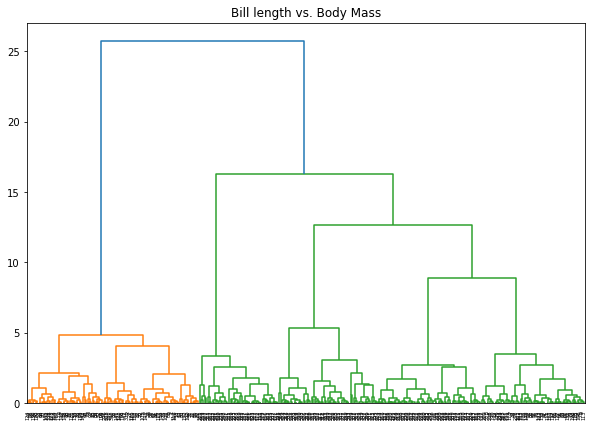

In [349]:
plt.figure(figsize=(10, 7))
plt.title("Bill length vs. Body Mass")
den3 = shc.dendrogram(shc.linkage(data_new3[:,0:2], method='ward'))

In [350]:
### Optimal number of clusters is 2

In [351]:
cluster3 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster3.fit_predict(data_new3[:,0:2])

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

Text(0, 0.5, 'Body mass')

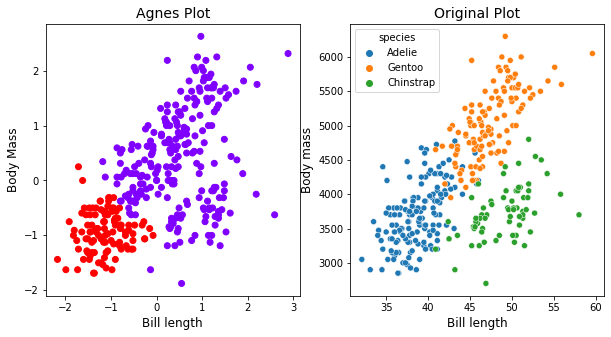

In [352]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data_new3[:,0], data_new3[:,1], c=cluster3.labels_, cmap='rainbow')
plt.title("Agnes Plot", size=14)
plt.xlabel("Bill length", size=12)
plt.ylabel("Body Mass", size=12)

plt.subplot(1, 2, 2)
sns.scatterplot(data=penguins, x=penguins['bill_length_mm'], y=penguins['body_mass_g'], hue="species")
plt.title("Original Plot", size=14)
plt.xlabel("Bill length", size=12)
plt.ylabel("Body mass", size=12)

In [353]:
pred3 = cluster3.fit_predict(data_new3[:,0:2])
pred3=pd.DataFrame(pred3,columns={"cluster"})
pred3["species"]=penguins["species"]

In [354]:
plot3 = pred3.groupby(["species", "cluster"]).size().reset_index(name="counts")

In [355]:
pred3['cluster'].value_counts()

0    238
1    106
Name: cluster, dtype: int64

In [356]:
alt.Chart(plot3).mark_bar(size=50).encode(
    x="cluster:O",
    y="counts:Q",
    color=alt.Color('species'),
    tooltip=["cluster", "counts", "species"],
).properties(height=400,width=250)

alt.Chart(...)

In [357]:
### Clustering taking three features bill length, flipper length, body mass by Agnes method

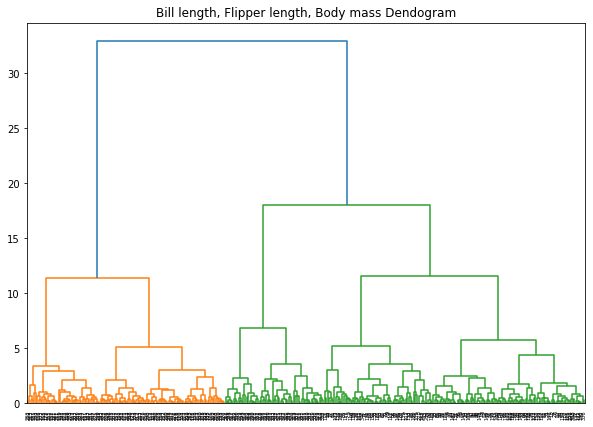

In [358]:
plt.figure(figsize=(10, 7))
plt.title("Bill length, Flipper length, Body mass Dendogram")
dend4 = shc.dendrogram(shc.linkage(data_new4[:,0:3], method='ward'))

In [359]:
### Optimal number of clusters is 2

In [360]:
cluster4 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster4.fit_predict(data_new4[:,0:3])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [361]:
fig = px.scatter_3d(data_new4, x=data_new4[:,0], y=data_new4[:,1], z=data_new4[:,2],
              color=cluster4.labels_.astype(float))
fig.show()

fig = px.scatter_3d(penguins, x=penguins['bill_length_mm'], y=penguins['flipper_length_mm'], z=penguins['body_mass_g'],
              color=penguins['species'])
fig.show()

In [362]:
### 3D image shows that Adelie species is well clustered and separated from remaining clusters which is evident from Chart below

In [363]:
pred4 = cluster4.fit_predict(data_new4[:,0:3])
pred4=pd.DataFrame(pred4,columns={"cluster"})
pred4["species"]=penguins["species"]

In [364]:
plot4 = pred4.groupby(["species", "cluster"]).size().reset_index(name="counts")
alt.Chart(plot4).mark_bar(size=50).encode(
    x="cluster:O",
    y="counts:Q",
    color=alt.Color("species", title="Species"),
    tooltip=["cluster", "counts", "species"],
).properties(height=400,width=250)



alt.Chart(...)

In [365]:
### Let us consider the features Bill length, Bill depth, Body mass

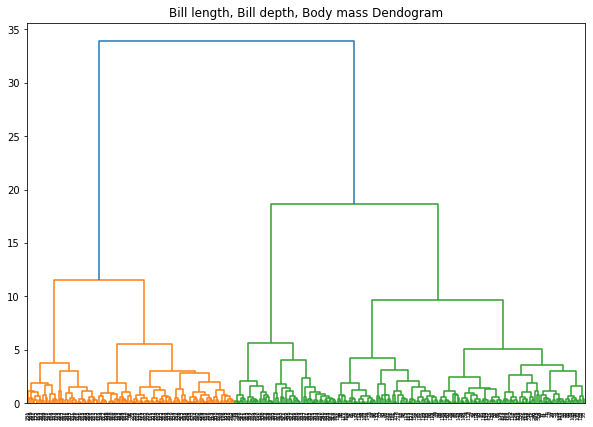

In [366]:
plt.figure(figsize=(10, 7))
plt.title("Bill length, Bill depth, Body mass Dendogram")
dend5 = shc.dendrogram(shc.linkage(data_new5[:,0:3], method='ward'))

In [367]:
### Dendrograms show that optimal clusters is 2

In [368]:
cluster5 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster5.fit_predict(data_new5[:,0:3])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [369]:
fig = px.scatter_3d(data_new5, x=data_new5[:,0], y=data_new5[:,1], z=data_new5[:,2],
              color=cluster5.labels_.astype(float))
fig.show()

fig = px.scatter_3d(penguins, x=penguins['bill_length_mm'], y=penguins['bill_depth_mm'], z=penguins['body_mass_g'],
              color=penguins['species'])
fig.show()

In [370]:
pred5 = cluster5.fit_predict(data_new5[:,0:3])
pred5=pd.DataFrame(pred5,columns={"cluster"})
pred5["species"]=penguins["species"]

In [371]:
plot5 = pred5.groupby(["species", "cluster"]).size().reset_index(name="counts")
alt.Chart(plot5).mark_bar(size=50).encode(
    x="cluster:O",
    y="counts:Q",
    color=alt.Color("species", title="Species"),
    tooltip=["cluster", "counts", "species"],
).properties(height=400,width=250)

alt.Chart(...)

In [372]:
### Considering body mass, bill length and bill depth Gentoo species is well segregated

In [373]:
### Considering four features Bill length, Bill depth, Flipper length, Body mass Dendogram

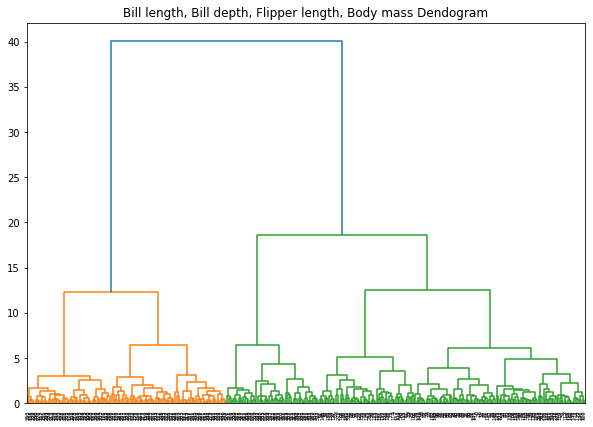

In [374]:
plt.figure(figsize=(10, 7))
plt.title("Bill length, Bill depth, Flipper length, Body mass Dendogram")
dend6 = shc.dendrogram(shc.linkage(data_new6[:,0:4], method='ward'))

In [375]:
### Optimal number of clusters is 2

In [376]:
cluster6 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster6.fit_predict(data_new6[:,0:4])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [377]:
pred6 = cluster6.fit_predict(data_new6[:,0:4])
pred6_df =pd.DataFrame(pred6,columns={"cluster"})
pred6_df["species"]=penguins["species"]

In [378]:
plot6 = pred6_df.groupby(["species", "cluster"]).size().reset_index(name="counts")
alt.Chart(plot6).mark_bar(size=50).encode(
    x="cluster:O",
    y="counts:Q",
    color=alt.Color("species", title="Species"),
    tooltip=["cluster", "counts", "species"],
).properties(height=400,width=250)

alt.Chart(...)

In [379]:
### Considering four features Agglomerative clustering is able to segregate Gentoo perfectly from other two

In [380]:
from sklearn.metrics import adjusted_rand_score

In [381]:
### Let us now move to DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [382]:
### DBSCAN is a clustering method that is used in machine learning to separate clusters of high density from clusters of low density. 
### Given that DBSCAN is a density based clustering algorithm, it does a great job of seeking areas in the data that have a high density of observations,
### versus areas of the data that are not very dense with observations.

In [383]:
### DBSCAN

In [384]:
from sklearn.neighbors import NearestNeighbors

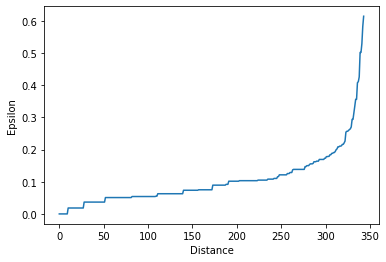

In [385]:
NN1=NearestNeighbors(n_neighbors=2)
dist1=NN1.fit(data_new1[:,0:2])
# indices and distance values
distance1,indices1=dist1.kneighbors(data_new1[:,0:2])
# Now sorting the distance increasing order
distance1_sorted=np.sort(distance1,axis=0)
# sorted distances
dist_sort1=distance1_sorted[:,1]
# plot between distance vs epsilon
plt.plot(dist_sort1)
plt.xlabel('Distance')
plt.ylabel('Epsilon')
plt.show()

In [386]:
### Calculate the average distance between each point in the data set and its 2 nearest neighbors, selected MinPts value
### We can calculate the distance from each point to its closest neighbor using the NearestNeighbors. The point itself is included in n_neighbors.
### The kneighbors method returns two arrays, one which contains the distance to the closest n_neighbors points and the other which contains the index for each of those points.
### The ideal value for ε will be equal to the distance value at the “crook of the elbow”, or the point of maximum curvature.

In [387]:
### epsilon is just a number that represents the radius of the circle around a particular point that we are going to consider the neighborhood of that point.
### min_samples or min_points is a threshold on the least number of points that we want to see in a point’s neighborhood.

In [388]:
### One of the issues with DBSCAN is finding epsilon and min points. Let us do a search for epsilon based on epsilon vs. distance graph
### It shows that epsilon optimal value is between  0.2 and 0.4

In [389]:
from sklearn.metrics import rand_score, adjusted_mutual_info_score

In [390]:
from sklearn.cluster import DBSCAN

In [391]:
import numpy as np

In [392]:
### Let us also consider a range of minpoint values

In [393]:
epsilon_list1 = np.arange(0.2, 0.4, 0.01)
minpoint_list1 = np.arange(2, 5, 1)

In [394]:
eps_list1 = []
min_list1 = []
dbscan_silhoutte1 = []
dbscan_randscore1 = []
dbscan_adjrandscore1 = []
for epsilons in epsilon_list1:
    for minpoints in minpoint_list1:
        eps_list1.append(epsilons)
        min_list1.append(minpoints)
        dbscan1 = DBSCAN(eps=epsilons, min_samples= minpoints)
        cluster1 = dbscan1.fit_predict(data_new1[:,0:2])
        dbscan_silhoutte1.append(silhouette_score(data_new1[:,0:2], cluster1))
        dbscan_randscore1.append(rand_score(data_new1[:,2], cluster1))
        dbscan_adjrandscore1.append(adjusted_rand_score(penguins1["species"], cluster1))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values b

In [395]:
### The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples 
### and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
### The raw RI score is then “adjusted for chance” into the ARI score
### Adjusted Rand Index (ARI) (Rand, 1971) and Adjusted Mutual Information (AMI) measure the similarity of the true labelling and the clustering labelling,
### while ignoring the permutation sand with chance normalization, meaning random assignments will have a score close to zero.

In [396]:
df1 = pd.DataFrame({'Epsilon':eps_list1,'Min Points':min_list1,'Silhoutte Score':dbscan_silhoutte1,
                     'Rand Index':dbscan_randscore1,'Adjusted Rand Index':dbscan_adjrandscore1})
df1.head(5)

,Epsilon,Min Points,Silhoutte Score,Rand Index,Adjusted Rand Index
0,0.20,2,-0.050516,0.837125,0.615391
1,0.20,3,-0.071198,0.833802,0.610157
2,0.20,4,0.104899,0.791189,0.510072
3,0.21,2,-0.045903,0.844464,0.636569
4,0.21,3,0.018772,0.840735,0.630466


In [397]:
df1[df1['Silhoutte Score']==df1['Silhoutte Score'].max()]

,Epsilon,Min Points,Silhoutte Score,Rand Index,Adjusted Rand Index
42,0.34,2,0.317234,0.379212,0.001984
43,0.34,3,0.317234,0.379212,0.001984
44,0.34,4,0.317234,0.379212,0.001984
45,0.35,2,0.317234,0.379212,0.001984
46,0.35,3,0.317234,0.379212,0.001984
47,0.35,4,0.317234,0.379212,0.001984
49,0.36,3,0.317234,0.379212,0.001984
50,0.36,4,0.317234,0.379212,0.001984
52,0.37,3,0.317234,0.379212,0.001984
53,0.37,4,0.317234,0.379212,0.001984


In [398]:
### It can be found that epsilon between 0.34 and 0.38 with minpoints of 2,3 or 4 can give the best clustering based on Silhoutte score 

In [399]:
df1[df1['Rand Index']==df1['Rand Index'].max()]

,Epsilon,Min Points,Silhoutte Score,Rand Index,Adjusted Rand Index
23,0.27,4,0.24707,0.88367,0.736984


In [400]:
### It can be found that epsilon between 0.27  with minpoints of 4 can give the best clustering based on rand score 

In [401]:
df1[df1['Adjusted Rand Index']==df1['Adjusted Rand Index'].max()]

,Epsilon,Min Points,Silhoutte Score,Rand Index,Adjusted Rand Index
23,0.27,4,0.24707,0.88367,0.736984


In [402]:
### It can be found that epsilon between 0.23 with minpoints of 4 can give the best clustering based on adjusted rand score 

In [403]:
### Based on the above results let us consider epsilon of 0.27 and min points 4

In [404]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_new1_scaled = scaler.fit_transform(data_new1)
dbscan_data1 = DBSCAN(eps=0.27, min_samples = 4)
clusters_data1 = dbscan_data1.fit(data_new1[:,0:2])

Text(0, 0.5, 'Bill Depth')

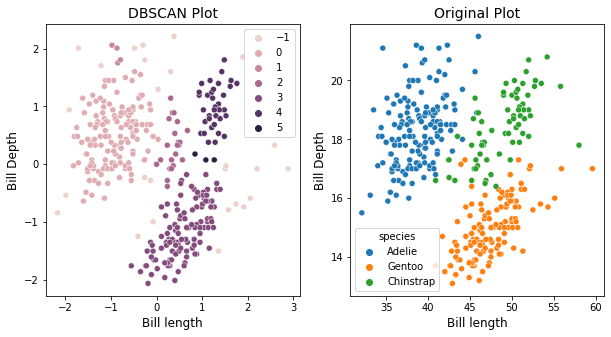

In [405]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
#plt.scatter(data_new1[:,0], data_new1[:,1], c=clusters_data1.labels_.astype(float), cmap='rainbow')
sns.scatterplot(data=data_new1, x=data_new1[:,0], y=data_new1[:,1], hue=clusters_data1.labels_.astype(float))
plt.title("DBSCAN Plot", size=14)
plt.xlabel("Bill length", size=12)
plt.ylabel("Bill Depth", size=12)

plt.subplot(1, 2, 2)
sns.scatterplot(data=penguins, x=penguins['bill_length_mm'], y=penguins['bill_depth_mm'], hue="species")
plt.title("Original Plot", size=14)
plt.xlabel("Bill length", size=12)
plt.ylabel("Bill Depth", size=12)

In [406]:
dbpred1 = clusters_data1.fit_predict(data_new1[:,0:2])
dbpred1_df =pd.DataFrame(dbpred1,columns={"cluster"})
dbpred1_df["species"]=penguins["species"]

In [407]:
### Adelie stands out from other species

In [408]:
dbplot1 = dbpred1_df.groupby(["species", "cluster"]).size().reset_index(name="counts")
alt.Chart(dbplot1).mark_bar(size=50).encode(
    x="cluster:O",
    y="counts:Q",
    color=alt.Color("species", title="Species"),
    tooltip=["cluster", "counts", "species"],
).properties(height=400,width=500)

alt.Chart(...)

In [409]:
### Consider other two features bill length and flipper length

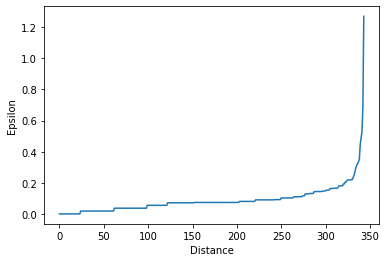

In [410]:
NN2=NearestNeighbors(n_neighbors=2)
dist2=NN2.fit(data_new2[:,0:2])
# indices and distance values
distance2,indices2=dist2.kneighbors(data_new2[:,0:2])

# Now sorting the distance increasing order
distance2_sorted=np.sort(distance2,axis=0)
# sorted distances
dist_sort2=distance2_sorted[:,1]
# plot between distance vs epsilon
plt.plot(dist_sort2)
plt.xlabel('Distance')
plt.ylabel('Epsilon')
plt.show()

In [411]:
### Optimal value of epsilon ranges between 0.1 and 0.4

In [412]:
epsilon_list2 = np.arange(0.1, 0.4, 0.01)
minpoint_list2 = np.arange(2, 5, 1)

In [413]:
eps_list2 = []
min_list2 = []
dbscan_silhoutte2 = []
dbscan_randscore2 = []
dbscan_adjrandscore2 = []
for epsilons in epsilon_list2:
    for minpoints in minpoint_list2:
        eps_list2.append(epsilons)
        min_list2.append(minpoints)
        dbscan2 = DBSCAN(eps=epsilons, min_samples= minpoints)
        cluster2 = dbscan2.fit_predict(data_new2[:,0:2])
        dbscan_silhoutte2.append(silhouette_score(data_new2[:,0:2], cluster2))
        dbscan_randscore2.append(rand_score(data_new2[:,2], cluster2))
        dbscan_adjrandscore2.append(adjusted_rand_score(penguins1["species"], cluster2))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values b

In [414]:
df2 = pd.DataFrame({'Epsilon':eps_list2,'Min Points':min_list2,'Silhoutte Score':dbscan_silhoutte2,
                     'Rand Index':dbscan_randscore2,'Adjusted Rand Index':dbscan_adjrandscore2})

In [415]:
df2[df2['Silhoutte Score']==df2['Silhoutte Score'].max()]

,Epsilon,Min Points,Silhoutte Score,Rand Index,Adjusted Rand Index
47,0.25,4,0.431961,0.867754,0.714881
50,0.26,4,0.431961,0.867754,0.714881


In [416]:
df2[df2['Rand Index']==df2['Rand Index'].max()]

,Epsilon,Min Points,Silhoutte Score,Rand Index,Adjusted Rand Index
41,0.23,4,0.22639,0.899129,0.772343


In [417]:
df2[df2['Adjusted Rand Index']==df2['Adjusted Rand Index'].max()]

,Epsilon,Min Points,Silhoutte Score,Rand Index,Adjusted Rand Index
41,0.23,4,0.22639,0.899129,0.772343


In [418]:
### Considered all best values of silhoutte, rand and adjusted rand epsilon 0.26 and min points 4 is chosen

In [419]:
scaler = StandardScaler()
data_new2_scaled = scaler.fit_transform(data_new2)
dbscan_data2 = DBSCAN(eps=0.26, min_samples = 4)
clusters_data2 = dbscan_data2.fit(data_new2[:,0:2])

Text(0, 0.5, 'Flipper Length')

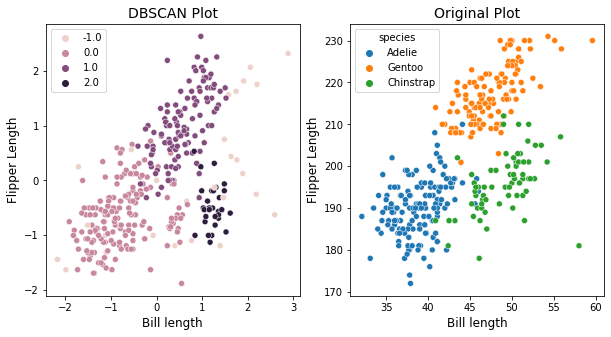

In [420]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
#plt.scatter(data_new1[:,0], data_new1[:,1], c=clusters_data1.labels_.astype(float), cmap='rainbow')
sns.scatterplot(data=data_new3, x=data_new3[:,0], y=data_new3[:,1], hue=clusters_data2.labels_.astype(float))
plt.title("DBSCAN Plot", size=14)
plt.xlabel("Bill length", size=12)
plt.ylabel("Flipper Length", size=12)

plt.subplot(1, 2, 2)
sns.scatterplot(data=penguins, x=penguins['bill_length_mm'], y=penguins['flipper_length_mm'], hue="species")
plt.title("Original Plot", size=14)
plt.xlabel("Bill length", size=12)
plt.ylabel("Flipper Length", size=12)

In [421]:
### Adeline differs significantly from others. Gentoo and Chinstrap are closely related

In [422]:
dbpred2 = clusters_data2.fit_predict(data_new2[:,0:2])
dbpred2_df =pd.DataFrame(dbpred2,columns={"cluster"})
dbpred2_df["species"]=penguins["species"]

In [423]:
dbplot2 = dbpred2_df.groupby(["species", "cluster"]).size().reset_index(name="counts")
alt.Chart(dbplot2).mark_bar(size=50).encode(
    x="cluster:O",
    y="counts:Q",
    color=alt.Color("species", title="Species"),
    tooltip=["cluster", "counts", "species"],
).properties(height=400,width=500)

alt.Chart(...)

In [424]:
### Adelie is well separated

In [425]:
### Consider bill length and body mass

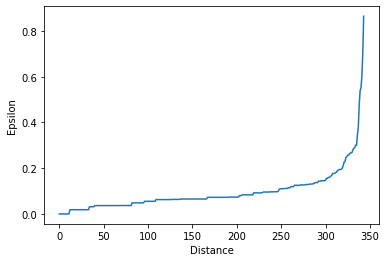

In [426]:
NN3=NearestNeighbors(n_neighbors=2)
dist3=NN3.fit(data_new3[:,0:2])
# indices and distance values
distance3,indices3=dist3.kneighbors(data_new3[:,0:2])

# Now sorting the distance increasing order
distance3_sorted=np.sort(distance3,axis=0)
# sorted distances
dist_sort3=distance3_sorted[:,1]
# plot between distance vs epsilon
plt.plot(dist_sort3)
plt.xlabel('Distance')
plt.ylabel('Epsilon')
plt.show()

In [427]:
### Optimal value of epsilon is between 0.1 and 0.4

In [428]:
epsilon_list3 = np.arange(0.1, 0.4, 0.01)
minpoint_list3 = np.arange(2, 5, 1)

In [429]:
eps_list3 = []
min_list3 = []
dbscan_silhoutte3 = []
dbscan_randscore3 = []
dbscan_adjrandscore3 = []
for epsilons in epsilon_list3:
    for minpoints in minpoint_list3:
        eps_list3.append(epsilons)
        min_list3.append(minpoints)
        dbscan3 = DBSCAN(eps=epsilons, min_samples= minpoints)
        cluster3 = dbscan3.fit_predict(data_new3[:,0:2])
        dbscan_silhoutte3.append(silhouette_score(data_new3[:,0:2], cluster3))
        dbscan_randscore3.append(rand_score(data_new3[:,2], cluster3))
        dbscan_adjrandscore3.append(adjusted_rand_score(penguins1["species"], cluster3))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values b

In [430]:
df3 = pd.DataFrame({'Epsilon':eps_list3,'Min Points':min_list3,'Silhoutte Score':dbscan_silhoutte3,
                     'Rand Index':dbscan_randscore3,'Adjusted Rand Index':dbscan_adjrandscore3})

In [431]:
df3[df3['Silhoutte Score']==df3['Silhoutte Score'].max()]

,Epsilon,Min Points,Silhoutte Score,Rand Index,Adjusted Rand Index
85,0.38,3,0.310369,0.382348,0.00944


In [432]:
df3[df3['Rand Index']==df3['Rand Index'].max()]

,Epsilon,Min Points,Silhoutte Score,Rand Index,Adjusted Rand Index
26,0.18,4,0.060801,0.764459,0.446731


In [433]:
df3[df3['Adjusted Rand Index']==df3['Adjusted Rand Index'].max()]

,Epsilon,Min Points,Silhoutte Score,Rand Index,Adjusted Rand Index
26,0.18,4,0.060801,0.764459,0.446731


In [434]:
### Considering all scores best values epsilon is chosen as 0.18 and min samples 4

In [435]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_new3_scaled = scaler.fit_transform(data_new3)
dbscan_data3 = DBSCAN(eps=0.18, min_samples = 4)
clusters_data3 = dbscan_data3.fit(data_new1[:,0:2])

Text(0, 0.5, 'Body mass')

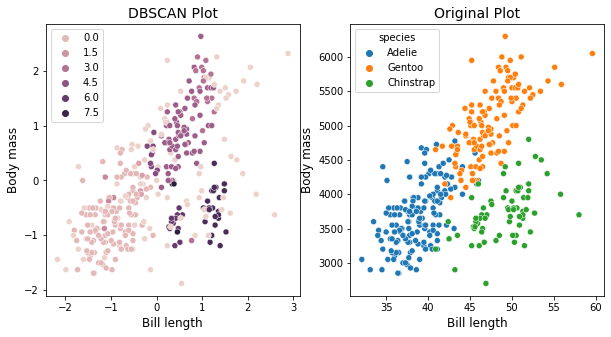

In [436]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
#plt.scatter(data_new1[:,0], data_new1[:,1], c=clusters_data1.labels_.astype(float), cmap='rainbow')
sns.scatterplot(data=data_new3, x=data_new3[:,0], y=data_new3[:,1], hue=clusters_data3.labels_.astype(float))
plt.title("DBSCAN Plot", size=14)
plt.xlabel("Bill length", size=12)
plt.ylabel("Body mass", size=12)

plt.subplot(1, 2, 2)
sns.scatterplot(data=penguins, x=penguins['bill_length_mm'], y=penguins['body_mass_g'], hue="species")
plt.title("Original Plot", size=14)
plt.xlabel("Bill length", size=12)
plt.ylabel("Body mass", size=12)

In [437]:
### Adelie is well separated. But few of Gentoo and Chinstrap is clustered with Adelie

In [438]:
dbpred3 = clusters_data3.fit_predict(data_new3[:,0:2])
dbpred3_df =pd.DataFrame(dbpred3,columns={"cluster"})
dbpred3_df["species"]=penguins["species"]

In [439]:
dbplot3 = dbpred3_df.groupby(["species", "cluster"]).size().reset_index(name="counts")
alt.Chart(dbplot3).mark_bar(size=50).encode(
    x="cluster:O",
    y="counts:Q",
    color=alt.Color("species", title="Species"),
    tooltip=["cluster", "counts", "species"],
).properties(height=400,width=500)

alt.Chart(...)

In [440]:
### Consider 3 features bill length, flipper length and body mass

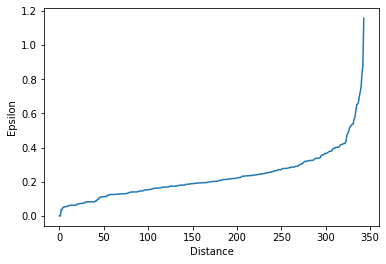

In [441]:
NN4=NearestNeighbors(n_neighbors=2)
dist4=NN4.fit(data_new4[:,0:3])
# indices and distance values
distance4,indices4=dist4.kneighbors(data_new4[:,0:3])

# Now sorting the distance increasing order
distance4_sorted=np.sort(distance4,axis=0)
# sorted distances
dist_sort4=distance4_sorted[:,1]
# plot between distance vs epsilon
plt.plot(dist_sort4)
plt.xlabel('Distance')
plt.ylabel('Epsilon')
plt.show()

In [442]:
epsilon_list4 = np.arange(0.3, 0.6, 0.01)
minpoint_list4 = np.arange(2, 5, 1)

In [443]:
eps_list4 = []
min_list4 = []
dbscan_silhoutte4 = []
dbscan_randscore4 = []
dbscan_adjrandscore4 = []
for epsilons in epsilon_list4:
    for minpoints in minpoint_list4:
        eps_list4.append(epsilons)
        min_list4.append(minpoints)
        dbscan4 = DBSCAN(eps=epsilons, min_samples= minpoints)
        cluster4 = dbscan4.fit_predict(data_new4[:,0:3])
        dbscan_silhoutte4.append(silhouette_score(data_new4[:,0:3], cluster4))
        dbscan_randscore4.append(rand_score(data_new4[:,3], cluster4))
        dbscan_adjrandscore4.append(adjusted_rand_score(penguins1["species"], cluster4))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values b

In [444]:
df4 = pd.DataFrame({'Epsilon':eps_list4,'Min Points':min_list4,'Silhoutte Score':dbscan_silhoutte4,
                     'Rand Index':dbscan_randscore4,'Adjusted Rand Index':dbscan_adjrandscore4})

In [445]:
df4[df4['Silhoutte Score']==df4['Silhoutte Score'].max()]

,Epsilon,Min Points,Silhoutte Score,Rand Index,Adjusted Rand Index
83,0.57,4,0.444863,0.812665,0.623469


In [446]:
df4[df4['Rand Index']==df4['Rand Index'].max()]

,Epsilon,Min Points,Silhoutte Score,Rand Index,Adjusted Rand Index
26,0.38,4,0.214385,0.847532,0.65132


In [447]:
df4[df4['Adjusted Rand Index']==df4['Adjusted Rand Index'].max()]

,Epsilon,Min Points,Silhoutte Score,Rand Index,Adjusted Rand Index
26,0.38,4,0.214385,0.847532,0.65132


In [448]:
### Let us chose epsilon 0.57 and min points 4

In [449]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_new4_scaled = scaler.fit_transform(data_new4)
dbscan_data4 = DBSCAN(eps=0.57, min_samples = 4)
clusters_data4 = dbscan_data4.fit(data_new4[:,0:3])

In [450]:
fig = px.scatter_3d(data_new4, x=data_new4[:,0], y=data_new4[:,1], z=data_new4[:,2],
              color=clusters_data4.labels_.astype(float))
fig.show()

fig = px.scatter_3d(penguins, x=penguins['bill_length_mm'], y=penguins['flipper_length_mm'], z=penguins['body_mass_g'],
              color=penguins['species'])
fig.show()

In [451]:
dbpred4 = clusters_data4.fit_predict(data_new4[:,0:3])
dbpred4_df =pd.DataFrame(dbpred4,columns={"cluster"})
dbpred4_df["species"]=penguins["species"]

In [452]:
dbplot4 = dbpred4_df.groupby(["species", "cluster"]).size().reset_index(name="counts")
alt.Chart(dbplot4).mark_bar(size=50).encode(
    x="cluster:O",
    y="counts:Q",
    color=alt.Color("species", title="Species"),
    tooltip=["cluster", "counts", "species"],
).properties(height=400,width=500)

alt.Chart(...)

In [453]:
### DBSCAN based cluster based on three features performs better when compared to two features the number of clusters formed is also not numerous

In [454]:
### Consider bill length, bill depth, body mass

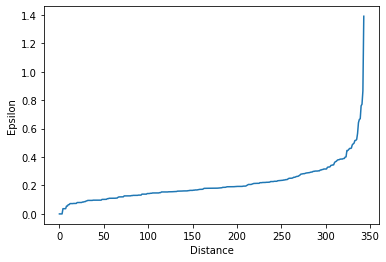

In [455]:
NN5=NearestNeighbors(n_neighbors=2)
dist5=NN5.fit(data_new5[:,0:3])
# indices and distance values
distance5,indices5=dist5.kneighbors(data_new5[:,0:3])
# Now sorting the distance increasing order
distance5_sorted=np.sort(distance5,axis=0)
# sorted distances
dist_sort5=distance5_sorted[:,1]
# plot between distance vs epsilon
plt.plot(dist_sort5)
plt.xlabel('Distance')
plt.ylabel('Epsilon')
plt.show()

In [456]:
epsilon_list5 = np.arange(0.3, 0.6, 0.01)
minpoint_list5 = np.arange(2, 5, 1)

In [457]:
eps_list5 = []
min_list5 = []
dbscan_silhoutte5 = []
dbscan_randscore5 = []
dbscan_adjrandscore5 = []
for epsilons in epsilon_list5:
    for minpoints in minpoint_list5:
        eps_list5.append(epsilons)
        min_list5.append(minpoints)
        dbscan5 = DBSCAN(eps=epsilons, min_samples= minpoints)
        cluster5 = dbscan5.fit_predict(data_new5[:,0:3])
        dbscan_silhoutte5.append(silhouette_score(data_new5[:,0:3], cluster5))
        dbscan_randscore5.append(rand_score(data_new5[:,3], cluster5))
        dbscan_adjrandscore5.append(adjusted_rand_score(penguins1["species"], cluster5))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values b

In [458]:
df5 = pd.DataFrame({'Epsilon':eps_list5,'Min Points':min_list5,'Silhoutte Score':dbscan_silhoutte5,
                     'Rand Index':dbscan_randscore5,'Adjusted Rand Index':dbscan_adjrandscore5})

In [459]:
df5[df5['Silhoutte Score']==df5['Silhoutte Score'].max()]

,Epsilon,Min Points,Silhoutte Score,Rand Index,Adjusted Rand Index
44,0.44,4,0.330663,0.80202,0.58846


In [460]:
df5[df5['Rand Index']==df5['Rand Index'].max()]

,Epsilon,Min Points,Silhoutte Score,Rand Index,Adjusted Rand Index
39,0.43,2,0.10924,0.911452,0.80374


In [461]:
df5[df5['Adjusted Rand Index']==df5['Adjusted Rand Index'].max()]

,Epsilon,Min Points,Silhoutte Score,Rand Index,Adjusted Rand Index
39,0.43,2,0.10924,0.911452,0.80374


In [462]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_new5_scaled = scaler.fit_transform(data_new5)
dbscan_data5 = DBSCAN(eps=0.44, min_samples = 4)
clusters_data5 = dbscan_data5.fit(data_new5[:,0:3])

In [463]:
fig = px.scatter_3d(data_new5, x=data_new5[:,0], y=data_new5[:,1], z=data_new5[:,2],
              color=clusters_data5.labels_.astype(float))
fig.show()

fig = px.scatter_3d(penguins, x=penguins['bill_length_mm'], y=penguins['bill_depth_mm'], z=penguins['body_mass_g'],
              color=penguins['species'])
fig.show()

In [464]:
dbpred5 = clusters_data5.fit_predict(data_new5[:,0:3])
dbpred5_df =pd.DataFrame(dbpred5,columns={"cluster"})
dbpred5_df["species"]=penguins["species"]

dbplot5 = dbpred5_df.groupby(["species", "cluster"]).size().reset_index(name="counts")
alt.Chart(dbplot5).mark_bar(size=50).encode(
    x="cluster:O",
    y="counts:Q",
    color=alt.Color("species", title="Species"),
    tooltip=["cluster", "counts", "species"],
).properties(height=400,width=500)

alt.Chart(...)

In [465]:
### DBSCAN based cluster based on three features performs better when compared to two features the number of clusters formed is also not numerous

In [466]:
### Considering four features bill length, bill depth, flipper length and body mass

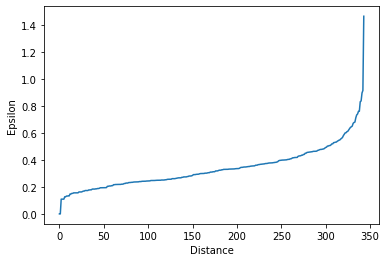

In [467]:
NN6=NearestNeighbors(n_neighbors=2)
dist6=NN6.fit(data_new6[:,0:4])
# indices and distance values
distance6,indices6=dist6.kneighbors(data_new6[:,0:4])

# Now sorting the distance increasing order
distance6_sorted=np.sort(distance6,axis=0)
# sorted distances
dist_sort6=distance6_sorted[:,1]
# plot between distance vs epsilon
plt.plot(dist_sort6)
plt.xlabel('Distance')
plt.ylabel('Epsilon')
plt.show()

In [468]:
epsilon_list6 = np.arange(0.4, 0.8, 0.01)
minpoint_list6 = np.arange(2, 5, 1)

In [469]:
eps_list6 = []
min_list6 = []
dbscan_silhoutte6 = []
dbscan_randscore6 = []
dbscan_adjrandscore6 = []
for epsilons in epsilon_list6:
    for minpoints in minpoint_list6:
        eps_list6.append(epsilons)
        min_list6.append(minpoints)
        dbscan6 = DBSCAN(eps=epsilons, min_samples= minpoints)
        cluster6 = dbscan6.fit_predict(data_new6[:,0:4])
        dbscan_silhoutte6.append(silhouette_score(data_new6[:,0:4], cluster6))
        dbscan_randscore6.append(rand_score(data_new6[:,4], cluster6))
        dbscan_adjrandscore6.append(adjusted_rand_score(penguins1["species"], cluster6))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values b

In [470]:
df6 = pd.DataFrame({'Epsilon':eps_list6,'Min Points':min_list6,'Silhoutte Score':dbscan_silhoutte6,
                     'Rand Index':dbscan_randscore6,'Adjusted Rand Index':dbscan_adjrandscore6})

In [471]:
df6[df6['Silhoutte Score']==df6['Silhoutte Score'].max()]

,Epsilon,Min Points,Silhoutte Score,Rand Index,Adjusted Rand Index
111,0.77,2,0.475795,0.816276,0.637372
112,0.77,3,0.475795,0.816276,0.637372
113,0.77,4,0.475795,0.816276,0.637372
114,0.78,2,0.475795,0.816276,0.637372
115,0.78,3,0.475795,0.816276,0.637372
116,0.78,4,0.475795,0.816276,0.637372
117,0.79,2,0.475795,0.816276,0.637372
118,0.79,3,0.475795,0.816276,0.637372
119,0.79,4,0.475795,0.816276,0.637372


In [472]:
df6[df6['Rand Index']==df6['Rand Index'].max()]

,Epsilon,Min Points,Silhoutte Score,Rand Index,Adjusted Rand Index
48,0.56,2,0.144259,0.919808,0.82122


In [473]:
df6[df6['Adjusted Rand Index']==df6['Adjusted Rand Index'].max()]

,Epsilon,Min Points,Silhoutte Score,Rand Index,Adjusted Rand Index
48,0.56,2,0.144259,0.919808,0.82122


In [474]:
### Choose epsilon of 0.79 and min points 3

In [475]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_new6_scaled = scaler.fit_transform(data_new6)
dbscan_data6 = DBSCAN(eps=0.79, min_samples = 3)
clusters_data6 = dbscan_data6.fit(data_new6[:,0:4])

In [476]:
dbpred6 = clusters_data6.fit_predict(data_new6[:,0:4])
dbpred6_df =pd.DataFrame(dbpred6,columns={"cluster"})
dbpred6_df["species"]=penguins["species"]

dbplot6 = dbpred6_df.groupby(["species", "cluster"]).size().reset_index(name="counts")
alt.Chart(dbplot6).mark_bar(size=50).encode(
    x="cluster:O",
    y="counts:Q",
    color=alt.Color("species", title="Species"),
    tooltip=["cluster", "counts", "species"],
).properties(height=400,width=500)

alt.Chart(...)

In [477]:
### Considering DBSCAN with three features is better compared to two or four features

In [478]:
### Dimensionality Reduction using Principal Component Analysis

In [479]:
### PCA with Raw Data

In [480]:
### Principal Components Analysis (PCA) is an algorithm to transform the columns of a dataset into a new set of features called Principal Components.
### By doing this, a large chunk of the information across the full dataset is effectively compressed in fewer feature columns. 
### This enables dimensionality reduction and ability to visualize the separation of classes or clusters if any. 
### It is not a feature selection technique. Rather, it is a feature combination technique. Because each PC is a weighted additive combination of all the columns in the original dataset. 
### The PCs are formed in such a way that the first Principal Component (PC1) explains more variance in original data compared to PC2. Likewise, PC2 explains more than PC3, and so on.  

In [481]:
from sklearn.decomposition import PCA

In [482]:
penguins2 = penguins1.drop(['species'], axis=1)
penguins2=penguins2.drop(['island'], axis=1)
penguins2=penguins2.drop(['sex'], axis=1)
penguins2

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.10000,18.70000,181.000000,3750.000000
1,39.50000,17.40000,186.000000,3800.000000
2,40.30000,18.00000,195.000000,3250.000000
3,43.92193,17.15117,200.915205,4201.754386
4,36.70000,19.30000,193.000000,3450.000000
...,...,...,...,...
339,55.80000,19.80000,207.000000,4000.000000
340,43.50000,18.10000,202.000000,3400.000000
341,49.60000,18.20000,193.000000,3775.000000
342,50.80000,19.00000,210.000000,4100.000000


In [483]:
pca = PCA().fit(penguins2)

In [484]:
variance_exp1 = pca.explained_variance_
variance_exp1

array([6.39541615e+05, 5.12442613e+01, 1.59421385e+01, 2.32982857e+00])

In [485]:
variance_prop1 = pca.explained_variance_ratio_

In [486]:
variance_cumulative1 = np.cumsum(pca.explained_variance_ratio_)

In [487]:
pca_df = pd.DataFrame({"Explained Variance":variance_exp1,"Explained Variance Proportion":variance_prop1,"Cumulative Variance":variance_cumulative1})
pca_df

,Explained Variance,Explained Variance Proportion,Cumulative Variance
0,639541.614820,0.999891,0.999891
1,51.244261,0.000080,0.999971
2,15.942138,0.000025,0.999996
3,2.329829,0.000004,1.000000


In [488]:
### From above table and below graph it is evident that with PCA on raw data PC1 is able to capture 99.99% of variance in data

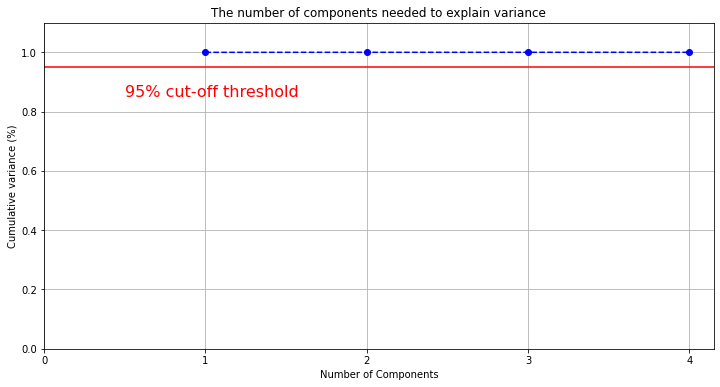

In [489]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
x = np.arange(1, 5, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(x, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 5, step=1)) #change from 0-based array index to 1-based label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
ax.grid(axis='x')
ax.grid(axis='y')
plt.show()

In [490]:
### Principal Component Analysis on Scaled Data

In [491]:
scaler = StandardScaler()
pca_scaled = scaler.fit_transform(penguins2)
pca = PCA()
pca.fit(pca_scaled)

PCA()

In [492]:
variance_exp2 = pca.explained_variance_
variance_prop2 = pca.explained_variance_ratio_
variance_cumulative2 = np.cumsum(pca.explained_variance_ratio_)

In [493]:
variance_prop2[0]

0.688438780973292

In [494]:
pca_df2 = pd.DataFrame({"Explained Variance":variance_exp2,"Explained Variance Proportion":variance_prop2,"Cumulative Variance":variance_cumulative2})
pca_df2

,Explained Variance,Explained Variance Proportion,Cumulative Variance
0,2.761784,0.688439,0.688439
1,0.774769,0.193129,0.881568
2,0.366301,0.091309,0.972877
3,0.108809,0.027123,1.000000


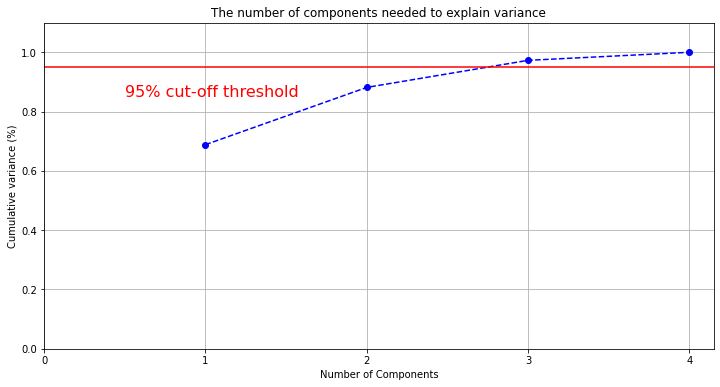

In [495]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
x = np.arange(1, 5, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(x, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 5, step=1)) #change from 0-based array index to 1-based label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
ax.grid(axis='x')
ax.grid(axis='y')
plt.show()

In [496]:
### The above table and graph reveals the significance of data scaling. Three components are needed to explain above 95% variance

In [497]:
penguins_info=penguins.select_dtypes(exclude='float')
penguins_info.head()

,species,island,sex
0,Adelie,Torgersen,male
1,Adelie,Torgersen,female
2,Adelie,Torgersen,female
3,Adelie,Torgersen,male
4,Adelie,Torgersen,female


In [498]:
sex=penguins_info.sex.tolist()
species=penguins_info.species.tolist()
island=penguins_info.island.tolist()

In [499]:
pca = PCA(n_components=3)
penguins_pca= pca.fit_transform(penguins2)
penguins_pca

array([[-4.52023209e+02,  1.33366364e+01,  1.14798019e+00],
       [-4.01949980e+02,  9.15269401e+00, -9.03734153e-02],
       [-9.51740904e+02, -8.26147557e+00, -2.35184450e+00],
       ...,
       [-4.26799926e+02, -9.13676765e-01,  7.48871320e+00],
       [-1.01577121e+02, -1.21656299e+01,  4.00939446e+00],
       [-4.26721701e+02, -5.78747970e+00,  6.65750996e+00]])

In [500]:
pca_df2 = pd.DataFrame(data = penguins_pca ,
        columns = ['PC1', 'PC2','PC3'])
pca_df2.head()

,PC1,PC2,PC3
0,-4.520232e+02,1.333664e+01,1.147980e+00
1,-4.019500e+02,9.152694e+00,-9.037342e-02
2,-9.517409e+02,-8.261476e+00,-2.351845e+00
3,-3.161786e-14,1.692171e-15,-6.739704e-15
4,-7.518127e+02,-1.975922e+00,-4.811170e+00


In [501]:
pca_df2['sex']=sex
pca_df2['species']=species
pca_df2['island'] = island
pca_df2.head()

,PC1,PC2,PC3,sex,species,island
0,-4.520232e+02,1.333664e+01,1.147980e+00,male,Adelie,Torgersen
1,-4.019500e+02,9.152694e+00,-9.037342e-02,female,Adelie,Torgersen
2,-9.517409e+02,-8.261476e+00,-2.351845e+00,female,Adelie,Torgersen
3,-3.161786e-14,1.692171e-15,-6.739704e-15,male,Adelie,Torgersen
4,-7.518127e+02,-1.975922e+00,-4.811170e+00,female,Adelie,Torgersen


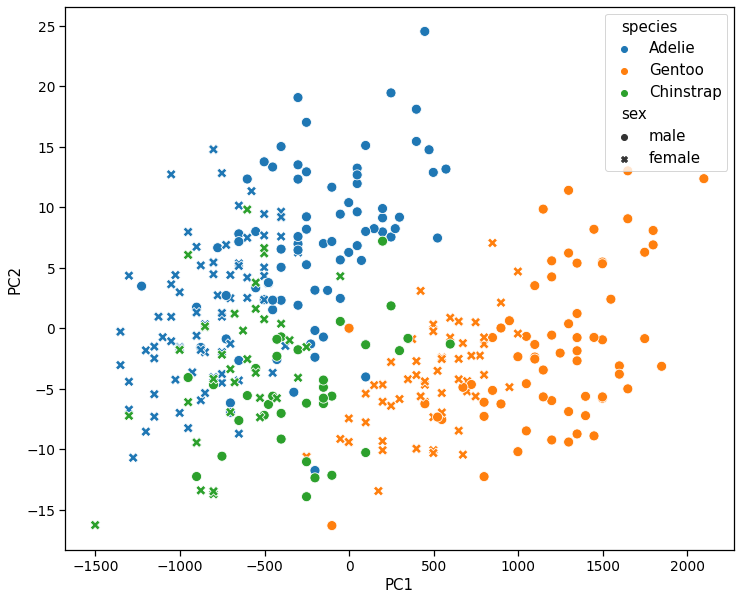

In [502]:
import seaborn as sns
plt.figure(figsize=(12,10))
with sns.plotting_context("notebook",font_scale=1.25):
    sns.scatterplot(x="PC1", y="PC2",
                    data=pca_df2,
                    hue="species",
                    style="sex",
                    s=100)

In [503]:
### Taking only PC1 and PC2 on scatter plot shows the distribution of species

In [504]:
fig = px.scatter_3d(pca_df2, x=pca_df2['PC1'], y=pca_df2['PC2'], z=pca_df2['PC3'],
              color=pca_df2['species'])
fig.show()

In [505]:
### Considering PC1, PC2 and PC3 is better at segregating clusters

Text(0.5, 1.0, 'PC1 vs Species: Penguins Data')

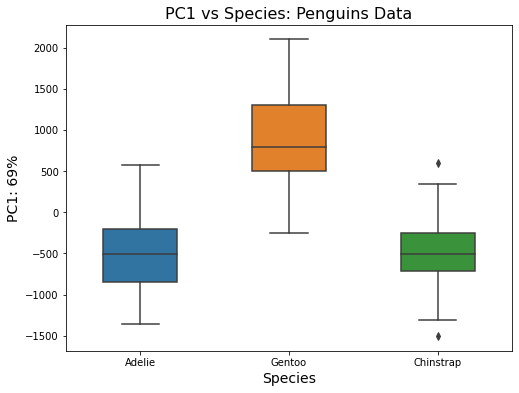

In [506]:
plt.figure(figsize=(8,6))
sns.boxplot(x="species",y="PC1",
            width=0.5,
            data=pca_df2)
plt.xlabel("Species", size=14)
plt.ylabel("PC1: "+f'{variance_prop2[0]*100:.0f}'+"%", size=14)
plt.title("PC1 vs Species: Penguins Data", size=16)

In [507]:
### We can clearly see how PC1 has captured the variation at Species level. 
### First principal component is telling how Gentoo Penguins are different from the other two species.

Text(0.5, 1.0, 'PC2 vs Species: Penguins Data')

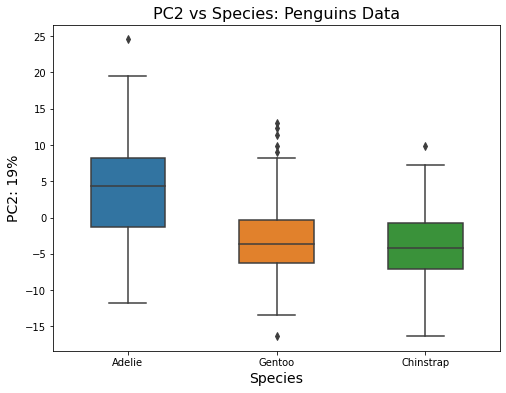

In [508]:
plt.figure(figsize=(8,6))
sns.boxplot(x="species",y="PC2",
            width=0.5,
            data=pca_df2)
plt.xlabel("Species", size=14)
plt.ylabel("PC2: "+f'{variance_prop2[1]*100:.0f}'+"%", size=14)
plt.title("PC2 vs Species: Penguins Data", size=16)

In [509]:
penguins_mapping = {"Adelie" : 0, "Chinstrap" : 1, "Gentoo": 2}
pca_df2['species'] = pca_df2['species'].map(penguins_mapping)


In [510]:
### Let us now try three clustering methods on PCA reduced data set considering PC1, PC2, PC3

In [511]:
data_new = pca_df2[['PC1','PC2','PC3','species']]


In [512]:
scaler = StandardScaler()
scaler.fit(data_new)
data_new1 = scaler.transform(data_new)

In [513]:
### Data is quite clusterable

In [514]:
1-hopkins(data_new1[:,0:3],5)

0.8582674501327969

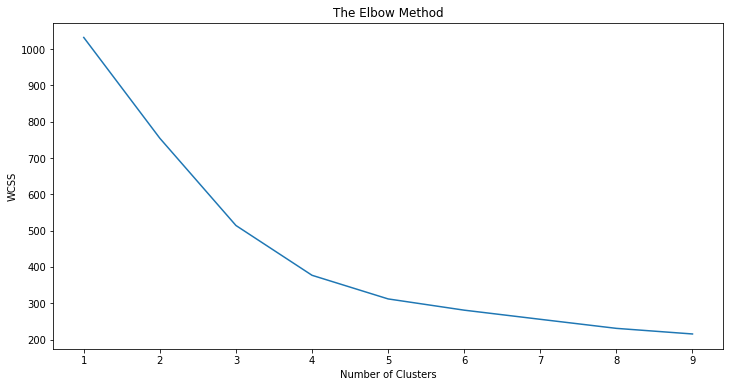

In [515]:
wcss=[]
for i in range(1, 10):
    kmeans1 = KMeans(n_clusters = i, random_state = 14)
    kmeans1.fit(data_new1[:,0:3])
    wcss.append(kmeans1.inertia_)
plt.plot(range(1, 10), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [516]:
range_n_clusters = [2, 3, 4, 5]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_new1[:,0:3])
    silhouette_avg = silhouette_score(data_new1[:,0:3], cluster_labels)
    print(
        "For number of clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For number of clusters = 2 The average silhouette_score is : 0.28665473791282536
For number of clusters = 3 The average silhouette_score is : 0.36749447400005547
For number of clusters = 4 The average silhouette_score is : 0.3708477592492802
For number of clusters = 5 The average silhouette_score is : 0.3570816353559881


In [517]:
### Considering both elbow method and silhoutte coefficient optimal number of clusters can be decided to be 4

In [518]:
kmeans1 = KMeans(n_clusters=4).fit(data_new1[:,0:3])
centroids1 = kmeans1.cluster_centers_
clusterer1 = KMeans(n_clusters=4, random_state=10)
cluster_labels1 = clusterer1.fit_predict(data_new1[:,0:3])
silhouette1 = silhouette_score(data_new1[:,0:3], cluster_labels1)
randscore1 = rand_score(data_new1[:,3], cluster_labels1)
adjrandscore1 = adjusted_rand_score(pca_df2["species"], cluster_labels1)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target



In [519]:
### We have captured Silhoute, rand and adjusted rand scores of k-means clustering

In [520]:
### Hierarchial Agnes clustering on PCA reduced data

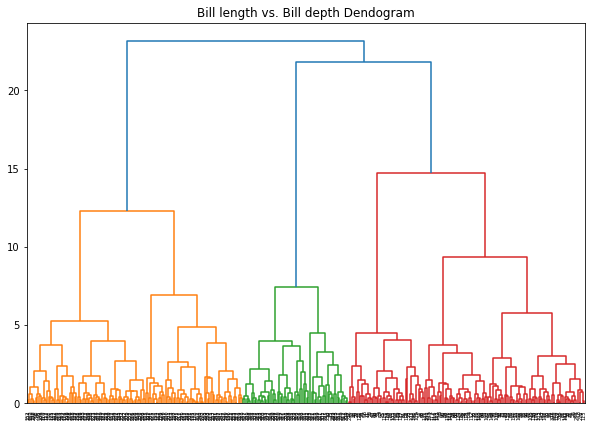

In [521]:
plt.figure(figsize=(10, 7))
plt.title("Bill length vs. Bill depth Dendogram")
dend1 = shc.dendrogram(shc.linkage(data_new1[:,0:3], method='ward'))

In [522]:
### AGnes clustering with 3 clusters is optimal as evident from dendrograms

In [523]:
cluster1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [524]:
cluster1.fit(data_new1[:,0:3])

AgglomerativeClustering(n_clusters=3)

In [525]:
silhouette2 = silhouette_score(data_new1[:,0:3], cluster1.labels_)
randscore2 = rand_score(data_new1[:,3], cluster1.labels_)
adjrandscore2 = adjusted_rand_score(pca_df2["species"], cluster1.labels_)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target



In [526]:
### We have captured Silhoute, rand and adjusted rand scores of Agnes clustering

In [527]:
### DBSCAN on PCA reduced data

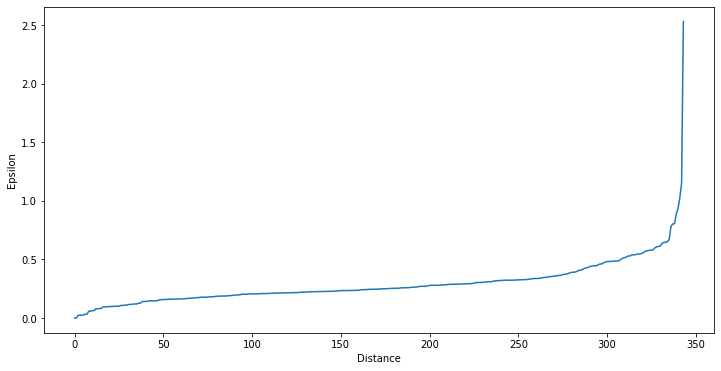

In [528]:
NN1=NearestNeighbors(n_neighbors=2)
dist1=NN1.fit(data_new1[:,0:3])
# indices and distance values
distance1,indices1=dist1.kneighbors(data_new1[:,0:3])
# Now sorting the distance increasing order
distance1_sorted=np.sort(distance1,axis=0)
# sorted distances
dist_sort1=distance1_sorted[:,1]
# plot between distance vs epsilon
plt.plot(dist_sort1)
plt.xlabel('Distance')
plt.ylabel('Epsilon')
plt.show()


In [529]:
### Optimal epsilon between 0.5 and 1

In [530]:
epsilon_list1 = np.arange(0.5, 1, 0.02)
minpoint_list1 = np.arange(2, 5, 1)


In [531]:
eps_list1 = []
min_list1 = []
dbscan_silhoutte1 = []
dbscan_randscore1 = []
for epsilons in epsilon_list1:
    for minpoints in minpoint_list1:
        eps_list1.append(epsilons)
        min_list1.append(minpoints)
        dbscan1 = DBSCAN(eps=epsilons, min_samples= minpoints)
        cluster1 = dbscan1.fit_predict(data_new1[:,0:3])
        dbscan_silhoutte1.append(silhouette_score(data_new1[:,0:3], cluster1))
        dbscan_randscore1.append(rand_score(data_new1[:,3], cluster1))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values b

In [532]:
df1 = pd.DataFrame({'Epsilon':eps_list1,'Min Points':min_list1,'Silhoutte Score':dbscan_silhoutte1,
                     'Rand Index':dbscan_randscore1})
df1.head(5)

,Epsilon,Min Points,Silhoutte Score,Rand Index
0,0.50,2,-0.184211,0.636145
1,0.50,3,-0.056269,0.633568
2,0.50,4,0.195367,0.633382
3,0.52,2,-0.186441,0.636280
4,0.52,3,-0.058542,0.633806


In [533]:
df1[df1['Silhoutte Score']==df1['Silhoutte Score'].max()]

,Epsilon,Min Points,Silhoutte Score,Rand Index
66,0.94,2,0.391587,0.368178
67,0.94,3,0.391587,0.368178
68,0.94,4,0.391587,0.368178
69,0.96,2,0.391587,0.368178
70,0.96,3,0.391587,0.368178
71,0.96,4,0.391587,0.368178
72,0.98,2,0.391587,0.368178
73,0.98,3,0.391587,0.368178
74,0.98,4,0.391587,0.368178


In [534]:
df1[df1['Rand Index']==df1['Rand Index'].max()]

,Epsilon,Min Points,Silhoutte Score,Rand Index
15,0.6,2,-0.08986,0.642959


In [535]:
### Based on rand and silhoutte scores let us take epsilon of 0.96 and min points 4

In [536]:
dbscan_data1 = DBSCAN(eps=0.96, min_samples = 4)
clusters_data1 = dbscan_data1.fit(data_new1[:,0:3])

In [537]:
silhouette3 = silhouette_score(data_new1[:,0:3], clusters_data1.labels_)
randscore3 = rand_score(data_new1[:,3], clusters_data1.labels_)
adjrandscore3 = adjusted_rand_score(pca_df2["species"], clusters_data1.labels_)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and binary values for target



In [538]:
### We have captured Silhoute, rand and adjusted rand scores DBSCAN clustering

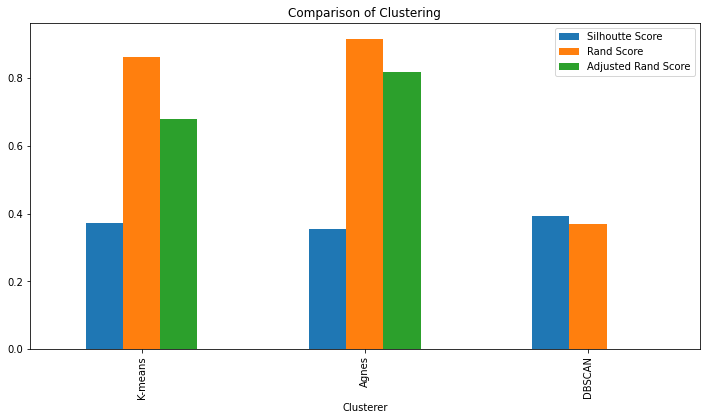

In [539]:
data = [[ silhouette1,randscore1,adjrandscore1],[silhouette2, randscore2,adjrandscore2],[silhouette3, randscore3,adjrandscore3]]
comparison = pd.DataFrame(data,columns=['Silhoutte Score','Rand Score','Adjusted Rand Score'],index=['K-means','Agnes','DBSCAN'])
comparison.plot.bar()
plt.title("Comparison of Clustering")
plt.xlabel("Clusterer")
plt.legend()

In [540]:
comparison

,Silhoutte Score,Rand Score,Adjusted Rand Score
K-means,0.370848,0.860465,0.678603
Agnes,0.355086,0.916011,0.818373
DBSCAN,0.391587,0.368178,0.001593


In [541]:
### DBSCAN performs better with respect to Silhoutte score 
### Agnes clustering performs better compared to others wrt Rand and Adjusted rand scores